# Импорт

In [1]:
import json
from pprint import pprint
import re

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import plotly.express as px


<div class="alert alert-success">
<b>✔️:</b> </div>

# Знакомство с данными

## Описание датасета

<div class="alert alert-info"> <b>✅ Бизнес-цель</b> <br>
    Предсказывать/сравнивать цены ноутбуков в зависимости от их характеристик. </div>

<div class="alert alert-info"> <b>✅ Описание данных </b> <br>
Датасет представляет собой таблицу с ценами и характеристиками ноутбуков, предлагаемых на маркетплейсе Wildberries, <br>на дату 24.12.2002, пользователям без регистрации (в режиме инкогнито) в г. Москва.

In [2]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('wbdata.csv')
raw_data = pd.read_csv('wbdata.csv')
df.head(5)

,Unnamed: 0,Наименование,id,Скидка,Цена,Цена со скидкой,Бренд,id бренда,feedbacks,rating,Ссылка,seller_name,seller_rating,seller_sales,Тактовая частота процессора,Количество ядер процессора,Линейка процессоров,Процессор,Вес с упаковкой (кг),Вес без упаковки (кг),Глубина предмета,Ширина предмета,Ширина упаковки,Высота упаковки,Длина упаковки,Материал корпуса,Производитель видеопроцессора,Комплектация,Количество динамиков,Объем eMMC,Тип накопителя,Операционная система,Версия операционной системы,Модель,Гарантийный срок,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Страна производства,Назначение ноутбука,Порт USB 3.x,Порт USB 4.x,Разъем для наушн./микрофона 3.5мм,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера,Повод,Транспортировка,Хрупкость,Код производителя ноутбуков,Доп. опции ноутбука,Назначение подарка,Объем Intel Optane,Код производителя
0,0,"NB283 14"" N3350, 14"" 1366*768 IPS",103561157,21,17390,13738,Irbis,18909,68,5,https://www.wildberries.ru/catalog/103561157/d...,WILDBERRIES,-1.0,-1,1.1 МГц,2,Intel Celeron,Intel Celeron N3350,1.7 кг,1.27 кг,21.75 см,32.93 см,8 см,23.5 см,34.5 см,пластик,Intel,адаптер питания; гарантийный талон; инструкция...,2 шт.,128 Гб,eMMC,Windows,Windows 10 Pro,NB283,12 месяцев,IPS,14,матовая,1366x768,60 Гц,4500 мА*ч,до 4 часов,1 miniHDMI,micro SD,4,LPDDR4,Wi-Fi; Bluetooth,встроенная,Intel HD Graphics 500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Intel Core i5 2.4ГГц 8ГБ 512ГБ,132526920,16,64990,54591,Realme,48914,9,5,https://www.wildberries.ru/catalog/132526920/d...,WILDBERRIES,-1.0,-1,2.4 МГц,4,Intel Core i5 11 го поколения,11th Gen Intel i5 1135G7,2.36 кг,1.38 кг,NaN,NaN,25.6 см,7.1 см,33.5 см,алюминий,Intel,NaN,2 шт.,NaN,SSD,Windows 11,Windiws 11,RMNB1002,1 год,IPS,14,NaN,2160×1440,NaN,6952 мАч / 54 Вт·ч,до 11 часов,NaN,NaN,8 ГБ,4266 МГц LPDDR4c,Wi-Fi; Bluetooth,Интегрированная,Intel Iris Xe,512 Гб,Китай,бизнес,Type-A USB 3.0,Type-C(Thunderbolt)USB 4.0,3.5 мм разъем под наушники,Type-C(Thunderbolt)USB 4.0,Type-CUSB 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Intel Core i5 2.4ГГц 16ГБ 512ГБ,132248430,16,79990,67191,Realme,48914,8,5,https://www.wildberries.ru/catalog/132248430/d...,WILDBERRIES,-1.0,-1,NaN,4,Intel Core i5,NaN,NaN,1.37 кг,NaN,NaN,25.6 см,7.5 см,33.5 см,алюминий,Intel,NaN,NaN,NaN,SSD,Windows 11,Windows 11,CloudPro002,1 год,IPS,14,NaN,2160 × 1440,NaN,NaN,до 12 часов,NaN,NaN,16 ГБ,LPDDR4,Wi-Fi; Bluetooth,NaN,Графическая карта: Intel® Iris® Xe Graphics,512 Гб,Китай,NaN,USB A 3.2 Gen 1 5 Гбит/с,Thunderbolt 4 / USB 4,"3,5 мм разъем (наушники + микрофон)",Thunderbolt 4 / USB 4,USB C 3.2 Gen 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"NB290 15.6"" N4020 3200x1800 IPS 4+128G",133573452,21,21090,16661,Irbis,18909,23,5,https://www.wildberries.ru/catalog/133573452/d...,WILDBERRIES,-1.0,-1,1.1 МГц,2,Intel Celeron,Intel Celeron N4020,2 кг,1.7 кг,22.7 см,36.55 см,6 см,28.5 см,47 см,пластик,Intel,адаптер питания; гарантийный талон; инструкция...,2 шт.,128 Гб,eMMC,Windows,Windows 11 Home,Irbis NB290,12 месяцев,IPS,15.6,NaN,3200x1800,NaN,5000 мА*ч,до 5 часов,1 miniHDMI,microSD,4,LPDDR4,Wi-Fi; Bluetooth,встроенная,Intel UHD Graphics 600,NaN,NaN,NaN,USB 3.0,NaN,NaN,NaN,NaN,4 Мб,2.37 см,"miniHDMI; USB; jack 3,5mm",1 шт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Ноутбук AZ-1511 15.6"" 4x2Ghz 16Gb 512Gb",112299864,0,30400,30400,Azerty,431229,54,5,htt

In [171]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,897.0,4.480000e+02,2.590859e+02,0.0,224.0,448.0,672.0,896.0
id,897.0,1.175641e+08,2.454774e+07,9600822.0,104215910.0,123583177.0,137657365.0,141159890.0
Скидка,897.0,1.532887e+01,1.216314e+01,0.0,3.0,15.0,25.0,64.0
Цена,897.0,8.771079e+04,5.002746e+04,12500.0,52990.0,75900.0,115000.0,460000.0
Цена со скидкой,897.0,7.285726e+04,4.130414e+04,12500.0,44125.0,61224.0,94500.0,414000.0
id бренда,897.0,2.281542e+06,2.306832e+07,0.0,5786.0,6049.0,11399.0,310471037.0
feedbacks,897.0,2.371237e+00,1.376174e+01,0.0,0.0,0.0,0.0,355.0
rating,897.0,1.028986e+00,1.913080e+00,0.0,0.0,0.0,0.0,5.0
seller_rating,897.0,1.922185e+00,2.664157e+00,-1.0,-1.0,3.8,4.5,5.0


In [172]:
df.describe(include = 'object').T

,count,unique,top,freq
Наименование,897,793,Ноутбук,24
Бренд,895,69,Acer,183
Ссылка,897,897,https://www.wildberries.ru/catalog/103561157/d...,1
seller_name,897,99,WILDBERRIES,380
seller_sales,897,70,-1,380
...,...,...,...,...
Код производителя ноутбуков,248,218,82HL003BRK,3
Доп. опции ноутбука,233,147,подсветка клавиатуры,23
Назначение подарка,183,117,любимой; любимому; мужу,12
Объем Intel Optane,2,2,32 Гб,1


In [7]:
df.shape

(897, 78)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            897 non-null    int64  
 1   Наименование                          897 non-null    object 
 2   id                                    897 non-null    int64  
 3   Скидка                                897 non-null    int64  
 4   Цена                                  897 non-null    int64  
 5   Цена со скидкой                       897 non-null    int64  
 6   Бренд                                 895 non-null    object 
 7   id бренда                             897 non-null    int64  
 8   feedbacks                             897 non-null    int64  
 9   rating                                897 non-null    int64  
 10  Ссылка                                897 non-null    object 
 11  seller_name        

In [175]:
df.isnull().mean().sort_values(ascending=False).head(20)

Объем Intel Optane                      0.997770
Код производителя                       0.994426
Объем eMMC                              0.983278
Порт USB 4.x                            0.839465
Мультимедийные возможности              0.824972
Кэш память                              0.819398
Разъем VGA                              0.818283
Повод                                   0.800446
Разъем M.2                              0.797101
Назначение подарка                      0.795987
Транспортировка                         0.784838
Серия ноутбуков                         0.778149
Доп. опции ноутбука                     0.740245
Хрупкость                               0.738016
Код производителя ноутбуков             0.723523
Объем накопителя HDD                    0.715719
Порт Thunderbolt                        0.711260
Количество слотов оперативной памяти    0.676700
Порт USB 2.0                            0.630992
Разъем карт памяти                      0.620959
dtype: float64

In [176]:
df.duplicated().sum()

0

<div class="alert alert-info">
    <b>Комментарий<a class="tocSkip"></b>
       <br>
   Очень много пропусков. Довольно много столбцов где пропущены практически все значения. Построим карту распределения. 
</div>

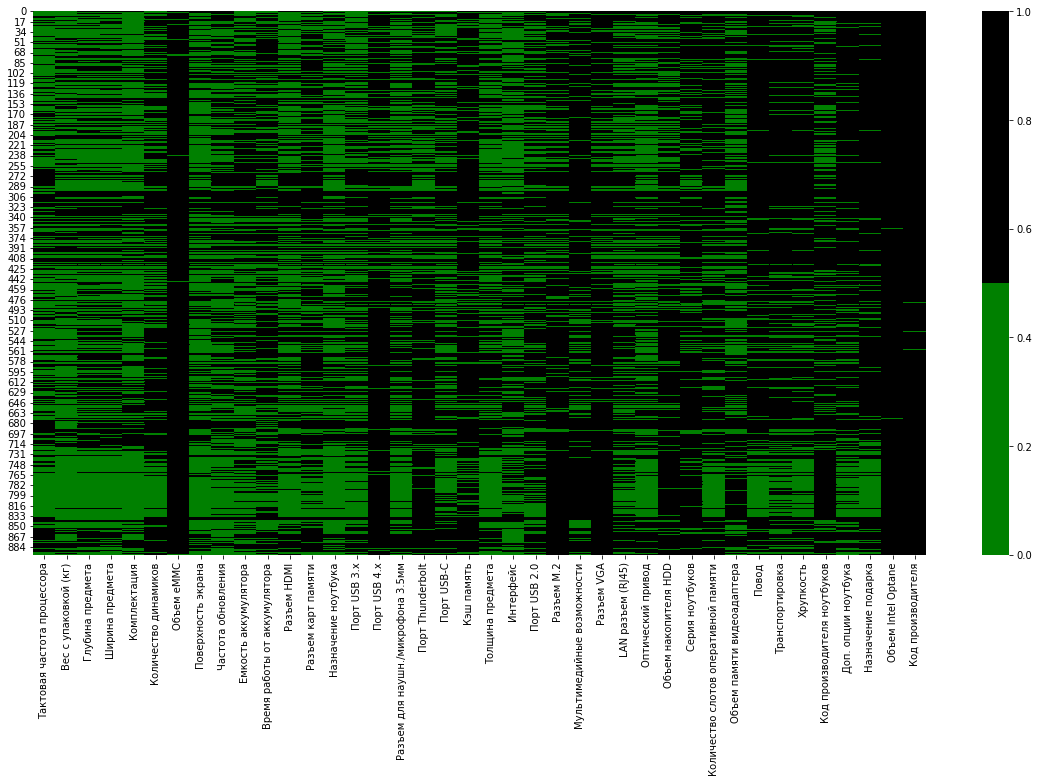

In [177]:
cols_with_nan = df.columns[df.isnull().mean()>0.3]

colors = ['green', 'black'] 
fig = plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df[cols_with_nan].isnull(),
    cmap=sns.color_palette(colors),
)

<div class="alert alert-info">
    <b>Комментарий<a class="tocSkip"></b>
<br> Четкой связи между пропущенными значениями на первый взгляд не прослеживается. </div>

## Очистка данных от пропусков и незначащих переменных

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ </b></u></p>
    Для дальнейшего анализа данных необходимо убрать столбцы, которые не несут полезной информации. 
    Затем приведем типы данных столцов в соответсвии их смысловому содержанию.
</div>

In [8]:
df.columns[df.nunique() == 897]
#Данные три столбца не могут нести полезной информации так как значения в них являются уникальными для каждого наблюдения. их точно следует удалить. 

Index(['Unnamed: 0', 'id', 'Ссылка'], dtype='object')

In [9]:
df.drop(columns = df.columns[df.nunique() == 897], inplace=True) 
df.shape

(897, 75)

In [10]:
df.drop(columns = ['id бренда', 'Цена со скидкой', 'Ширина упаковки', 'Высота упаковки', 'Длина упаковки', 
                    'Ширина предмета', 'Глубина предмета', 'Вес с упаковкой (кг)', 'Материал корпуса', 'Страна производства', 'Назначение ноутбука', 
                    'Разъем для наушн./микрофона 3.5мм', 'Повод', 'Транспортировка', 'Хрупкость', 'Код производителя ноутбуков', 
                    'Доп. опции ноутбука', 'Назначение подарка', 'Объем Intel Optane', 'Код производителя'], inplace=True)
#Кажется разумным сразу удалить столбцы, которые не будут влиять на цену товара, а также коррелирующие столбцы (цена со скидкой) и 
# малозначимые для цены (доп.опции ноутбука).

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Наименование                          897 non-null    object 
 1   Скидка                                897 non-null    int64  
 2   Цена                                  897 non-null    int64  
 3   Бренд                                 895 non-null    object 
 4   feedbacks                             897 non-null    int64  
 5   rating                                897 non-null    int64  
 6   seller_name                           897 non-null    object 
 7   seller_rating                         897 non-null    float64
 8   seller_sales                          897 non-null    object 
 9   Тактовая частота процессора           567 non-null    object 
 10  Количество ядер процессора            803 non-null    object 
 11  Линейка процессоров

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ </b></u></p>
    Слишком много пропущенной информации. Мы отбросили откровенно бесполезные признаки, для принятия решения о удаления/заполнении пропущенных значений надо глубже погрузиться в анализ каждого признака
</div>

### Процессор

In [12]:
df[["Тактовая частота процессора", "Количество ядер процессора", "Линейка процессоров", "Процессор"]].head()

,Тактовая частота процессора,Количество ядер процессора,Линейка процессоров,Процессор
0,1.1 МГц,2,Intel Celeron,Intel Celeron N3350
1,2.4 МГц,4,Intel Core i5 11 го поколения,11th Gen Intel i5 1135G7
2,NaN,4,Intel Core i5,NaN
3,1.1 МГц,2,Intel Celeron,Intel Celeron N4020
4,2000 МГц,4,Celeron,Intel Celeron N5105


In [13]:
df.rename(columns = {"Тактовая частота процессора": "Тактовая частота процессора, МГц"}, inplace=True)
df["Тактовая частота процессора, МГц"].unique()

array(['1.1 МГц', '2.4 МГц', nan, '2000 МГц', '3300 МГц', '1600 МГц',
       '2300 МГц', '2600 МГц', '1.6 МГц', '2.6 МГц', '3 МГц', '2100 МГц',
       '1100 МГц', '2700 МГц', '1000 МГц', '2400 МГц', '4.1 МГц',
       '4.2 МГц', '2.3 МГц', '1500 МГц', '1 МГц', '2.1 МГц', '3000 МГц',
       '2.7 МГц', '3.3 МГц', '1300 МГц', '2800 МГц', '2500 МГц',
       '1200 МГц', '1800 МГц', '1.2 МГц', '2.5 МГц', '3.1 МГц',
       '3100 МГц', '3.2 МГц', '1700 МГц', '1.8 МГц', '3200 МГц',
       '2.8 МГц', '2 МГц', '4400 МГц', '2.9 МГц', '2933 МГц', '1330 МГц',
       '4700 МГц', '3400 МГц', '2599 МГц', '3500 МГц', '4800 МГц',
       '4500 МГц', '3.5 МГц', '4.4 МГц', '3.8 МГц', '4000 МГц', '4.3 МГц',
       '2900 МГц', '22 МГц', '3700 МГц', '3002 МГц'], dtype=object)

In [14]:
df["Тактовая частота процессора, МГц"] = df["Тактовая частота процессора, МГц"].apply(lambda x: float(x[:-3].strip()) if isinstance(x, str) else x)
# для тактовой частоты выше 10 разделим значения на 1000
df["Тактовая частота процессора, МГц"] = df["Тактовая частота процессора, МГц"].apply(lambda x: round(x/1000, 1) if x>10 else x)
df["Тактовая частота процессора, МГц"].unique()

array([1.1, 2.4, nan, 2. , 3.3, 1.6, 2.3, 2.6, 3. , 2.1, 2.7, 1. , 4.1,
       4.2, 1.5, 1.3, 2.8, 2.5, 1.2, 1.8, 3.1, 3.2, 1.7, 4.4, 2.9, 4.7,
       3.4, 3.5, 4.8, 4.5, 3.8, 4. , 4.3, 0. , 3.7])

<AxesSubplot:>

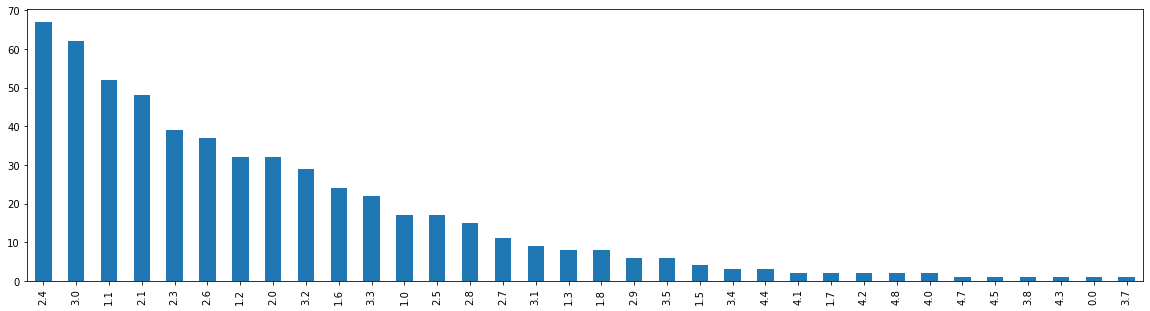

In [15]:
plt.figure(figsize=(20,5))
df["Тактовая частота процессора, МГц"].value_counts().plot(kind='bar')

In [16]:
df["Тактовая частота процессора, МГц"].isna().mean()

0.36789297658862874

In [17]:
df["Тактовая частота процессора, МГц"] = df["Тактовая частота процессора, МГц"].fillna(df["Тактовая частота процессора, МГц"].mode()[0])

<div class="alert alert-info">
<b> Комментарий<a class="tocSkip"></b> <br>
   По столбцу 37% значений NaN, их заменили модой </div>

In [18]:
df["Количество ядер процессора"].describe()

count     803
unique     37
top         2
freq      212
Name: Количество ядер процессора, dtype: object

In [19]:
df["Количество ядер процессора"].unique()

array(['2', '4', '6', '14', '2-ядерный', nan, '10', '8', '2 ядра',
       '4 ядра', '4 ядер / 8 потоков', '2 шт.', '6 ядер', '12', '8 ядер',
       '4 шт', '6 шт', '4 ядер', '2 шт', '14-ядерный', '12-ядерный',
       'четырехъядерный', '4-ядерный', '8-ядерный', '6-ядерный',
       'Intel Celeron G4900 (3.1 ГГц)', '2 ядер; 2 шт; 2', '14 ядер; 14',
       '6 ядер; 6 шт; 6', '6; 6 ядер; 6 шт', '4 ядер; 4; 4 шт',
       '4; 4 шт; 4 ядер', '2 шт; 2 шт; 2', '2; 2 шт; 2 ядер', '4 ядерный',
       '2; ноутбук электроника; офис', '220 кд/м2', '4;'], dtype=object)

<div class="alert alert-info">
<b> Есть странные значения такие как: "2; ноутбук электроника; офис", "220 кд/м2". Большинство значение придется исправлять вручную. Это быстрее.<a class="tocSkip"></b> <br>
   </div>

In [190]:
df["Количество ядер процессора"].value_counts()

2                                212
4                                198
8                                113
6                                 89
2 ядра                            53
4 ядра                            44
10                                13
14                                10
2-ядерный                          9
12                                 7
4-ядерный                          6
6 ядер                             5
4 ядер                             4
8 ядер                             4
2 шт                               3
4 ядер / 8 потоков                 3
8-ядерный                          3
6-ядерный                          2
4 ядерный                          2
4 шт                               2
12-ядерный                         2
6 шт                               2
2 шт.                              2
6; 6 ядер; 6 шт                    2
220 кд/м2                          1
4; 4 шт; 4 ядер                    1
2; ноутбук электроника; офис       1
2

In [20]:
# заполним двузначные значения
df["Количество ядер процессора"] = df["Количество ядер процессора"].apply(lambda x: 12 if x in ['12', '12-ядерный'] else x)
df["Количество ядер процессора"] = df["Количество ядер процессора"].apply(lambda x: 14 if x in ['14-ядерный', '14 ядер; 14', '14'] else x)
df["Количество ядер процессора"] = df["Количество ядер процессора"].apply(lambda x: 10 if x in ['10'] else x)

In [21]:
df.at[663, "Количество ядер процессора"] = 2 
#Intel Celeron G4900 (3.1 ГГц) двухядерный процессор

In [22]:
#Наблюдение со значением 220 кд/м2 по всей видимости находится ноутбук  https://www.wildberries.ru/catalog/119150391/detail.aspx с двумя ядрами 
df.loc[890, "Количество ядер процессора"] = 2

In [23]:
dual_core = ['2', '2 ядра', '2-ядерный', '2 шт', '2 шт; 2 шт; 2', '2; ноутбук электроника; офис', '2; 2 шт; 2 ядер', '2 ядер; 2 шт; 2', '2 шт.']
quad_core = ['4', '4 ядра', '4-ядерный', '4 ядерный', '4 ядер', 'четырехъядерный', '4;', '4; 4 шт; 4 ядер', '4 ядер; 4; 4 шт', '4 ядер / 8 потоков', '4 шт']
six_core = ['6 ядер','6 шт', '6-ядерный', '6; 6 ядер; 6 шт', '6 ядер; 6 шт; 6', '6']
eight_core = ['8 ядер', '8-ядерный', '8']
df["Количество ядер процессора"] = df["Количество ядер процессора"].apply(lambda x: 2 if x in dual_core else x)


df["Количество ядер процессора"] = df["Количество ядер процессора"].apply(lambda x: 4 if x in quad_core else x)
df["Количество ядер процессора"] = df["Количество ядер процессора"].apply(lambda x: 6 if x in six_core else x)
df["Количество ядер процессора"] = df["Количество ядер процессора"].apply(lambda x: 8 if x in eight_core else x)
df["Количество ядер процессора"].value_counts()

2.0     285
4.0     263
8.0     120
6.0     101
10.0     13
14.0     12
12.0      9
Name: Количество ядер процессора, dtype: int64

In [24]:
df["Количество ядер процессора"].isna().mean()

0.10479375696767002

In [25]:
#df["Количество ядер процессора"].info()

<div class="alert alert-success">
<b> ✔️ Успешно переопределили значения в столбце "Количество ядер процессора". Пропущенные значения можно заменить например модой. </b> </div>


In [26]:
df["Количество ядер процессора"] = df["Количество ядер процессора"].fillna(df["Количество ядер процессора"].mode()[0])

In [198]:
df["Линейка процессоров"].describe()

count               729
unique              109
top       Intel Core i5
freq                 92
Name: Линейка процессоров, dtype: object

In [199]:
df["Линейка процессоров"].nunique()

109

In [27]:
# значения по столбцам "Линейка процессоров" и "Процессор" могут пересекаться, поэтому заменим NaN-значения в одном столбце 
# значениями из другого столбца, и наоборот.
df['Линейка процессоров'].fillna(df['Процессор'], inplace=True)
df['Процессор'].fillna(df['Линейка процессоров'], inplace=True)

<AxesSubplot:>

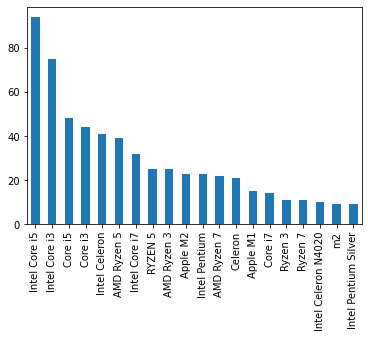

In [28]:
df["Линейка процессоров"].value_counts()[:20].plot(kind='bar')

In [202]:
print(df["Процессор"].isna().mean())
df["Процессор"].describe()

0.06688963210702341


count                837
unique               290
top       Core i3 1115G4
freq                  23
Name: Процессор, dtype: object

In [203]:
print(df["Линейка процессоров"].isna().mean())
df["Линейка процессоров"].nunique()

0.06688963210702341


154

<div class="alert alert-success">
<b> ✔️ Все ок. Пропущенных значений по 6%. Заменим модой </b> </div>

<AxesSubplot:>

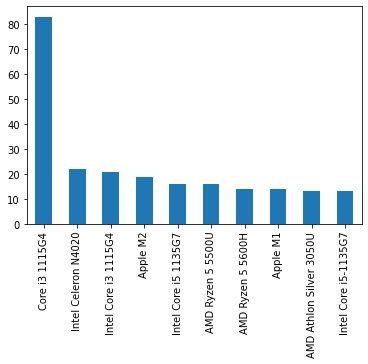

In [29]:
df["Процессор"] = df["Процессор"].fillna(df["Процессор"].mode()[0])
df["Процессор"].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

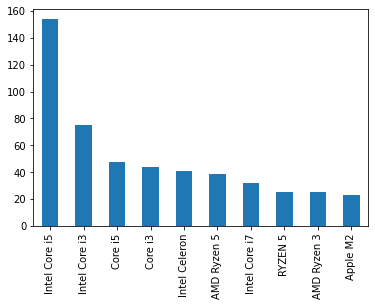

In [30]:
df["Линейка процессоров"] = df["Линейка процессоров"].fillna(df["Линейка процессоров"].mode()[0])
df["Линейка процессоров"].value_counts().head(10).plot(kind='bar')

<div class="alert alert-success">
<b>Итого:</b> 
    <br> ✔️ Столбец "Тактовая частота процессора, МГц" успешно обработан, приведен к типу float 64. Пропуски заполнены модой <br>
    ✔️ Столбец "Количество ядер процессора" успешно обработан, приведен к типу float 64. Пропуски заполнены модой. <br>
    ✔️ В столбцах "Линейка процессоров" и "Процессор" пропущеннные значения заполнены модой.
</div>

### Акустическая система

In [206]:
df['Количество динамиков'].describe()

count       345
unique        3
top       2 шт.
freq        341
Name: Количество динамиков, dtype: object

In [207]:
df['Количество динамиков'].unique()

array(['2 шт.', nan, '4 шт.', '1 шт.'], dtype=object)

In [208]:
df['Количество динамиков'] = df['Количество динамиков'].apply(lambda x: x[:-3].strip() if isinstance(x, str) else x)
# nan-значения пока заменить нечем, в данном случае возможно подойдет категория nunknonwn или -1

In [209]:
df['Количество динамиков'].value_counts() #столбец бесполезен

2    341
4      3
1      1
Name: Количество динамиков, dtype: int64

In [31]:
df.drop('Количество динамиков', axis=1, inplace=True)

<div class="alert alert-danger">
<b> ❌</b> Стобец "Количество динамиков" решено удалить как малоинформативный</div>

###  Накопители данных

In [211]:
df["Тип накопителя"].describe()

count     705
unique     43
top       SSD
freq      549
Name: Тип накопителя, dtype: object

In [212]:
df["Тип накопителя"].value_counts()

SSD                                 549
HDD                                  27
eMMC                                 20
ssd                                  20
твердотельный накопитель (SSD)       17
SSD M.2                              13
M.2                                  10
DDR4                                  8
SSD m.2                               4
SSD M2                                3
SSD; M.2; NVMe                        2
SSD m.5                               1
SSD m.11                              1
SSD m.6                               1
SSD; M2                               1
SMA                                   1
SSD m.10                              1
SSD m.29                              1
SSD m.28                              1
SSD + HDD                             1
SSD m.27                              1
SSD.                                  1
DDR3L                                 1
SSD m.12                              1
ноутбуки и компьютеры HDD             1


In [213]:
df[~df["Объем eMMC"].isna()][["Тип накопителя", "Объем eMMC"]]

,Тип накопителя,Объем eMMC
0,eMMC,128 Гб
3,eMMC,128 Гб
14,eMMC,128 Гб
22,eMMC,64 Гб
47,eMMC,64 Гб
53,eMMC,64 Гб
61,eMMC,64 Гб
72,eMMC,128 Гб
74,eMMC,64 Гб
139,SSD; eMMC,64 Гб


<div class="alert alert-info"> <b>Наличие eMMC обычно говорит о том что ноутбук относится к низкой ценовой категории. Объем накопителя в данном случае возможно будет играть роль, но сильно второстепенную.  столбец "Объем eMMC" лучше сразу удалить как мало информативный. Также кажется разумным сократить количество котегорий в столбце "Тип накопителя"</b></div>

In [32]:
df.drop(columns="Объем eMMC", inplace=True)

In [215]:
df["Тип накопителя"].value_counts()

SSD                                 549
HDD                                  27
eMMC                                 20
ssd                                  20
твердотельный накопитель (SSD)       17
SSD M.2                              13
M.2                                  10
DDR4                                  8
SSD m.2                               4
SSD M2                                3
SSD; M.2; NVMe                        2
SSD m.5                               1
SSD m.11                              1
SSD m.6                               1
SSD; M2                               1
SMA                                   1
SSD m.10                              1
SSD m.29                              1
SSD m.28                              1
SSD + HDD                             1
SSD m.27                              1
SSD.                                  1
DDR3L                                 1
SSD m.12                              1
ноутбуки и компьютеры HDD             1


<div class="alert alert-danger">
<b>Замечания:</b> <br>DDR3L, DDR4 - оперативная память <br>
    M.2 2280, M.2 - продвинутые модели SSD накопителя, выделим их в отдельную категорию<br>
<br></div>

In [216]:
df[df["Тип накопителя"] == 'DDR4']

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Версия операционной системы,Модель,Гарантийный срок,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
466,Ноутбук,0,67590,Huawei,3,4,pro.techno,4.2,1 011 отзывов на товары,2.4,6.0,AMD Ryzen 5,AMD Ryzen 5 5500U 2.1 ГГц,1.63 кг,NaN,NaN,DDR4,NaN,NaN,Matebook D 15,NaN,IPS,"15,6",NaN,1920x1080,NaN,NaN,NaN,NaN,NaN,16 гб,NaN,NaN,NaN,AMD,512 гб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,Ноутбук,0,89990,HP,0,0,pro.techno,4.2,1 011 отзывов на товары,2.4,10.0,Intel,Intel,1.69 кг,Intel,NaN,DDR4,NaN,NaN,15s-fq5048ci,NaN,IPS,"15,6",NaN,1920x1080,NaN,NaN,NaN,NaN,NaN,16 гб,NaN,bluetooth; wi-fi,NaN,Intel,512 гб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,Ноутбук,0,89390,HP,0,0,pro.techno,4.2,1 011 отзывов на товары,2.4,10.0,Intel Core i5 1235U 3.3 ГГц,Intel Iris Xe Graphics,1.69 кг,Intel,NaN,DDR4,NaN,NaN,15s-fq5046ci,NaN,IPS,"15,6",NaN,1920x1080,NaN,NaN,8 часов,NaN,NaN,16 гб,NaN,bluetooth; wi-fi,NaN,NaN,512; 512 гб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,Ноутбук,0,77990,HP,0,0,pro.techno,4.2,1 011 отзывов на товары,2.4,6.0,AMD,AMD,1.74 кг,NaN,NaN,DDR4,NaN,NaN,15s-eq2134ur,NaN,IPS,"15,6",NaN,1920x1080,NaN,NaN,9 часов,NaN,NaN,16 гб,16 Гб,bluetooth; wi-fi,NaN,NaN,512 гб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,HP Pavilion x360,0,77000,ElectroCiy,0,0,ElectroCity,5.0,11 отзывов на товары,3.7,4.0,Intel Core i3 1125G4,Intel Core i3 1125G4,1.5 кг,NaN,NaN,DDR4,Win 11,NaN,HP Pavilion x360 14-DY0007UR 3B3Q8EA,NaN,IPS,14 дюйм,NaN,1920x1080,3200 МГц,NaN,NaN,NaN,NaN,8 ГБ,DDR4,NaN,Intel UHD Graphics,встроенная видеокарта,512 Гб,NaN,NaN,NaN,NaN,8 Мб,NaN,USB Type-C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
708,Ноутбук,0,55000,ElectroCity,0,0,ElectroCity,5.0,11 отзывов на товары,2.4,2.0,AMD Athlon 3050U,AMD Athlon 3050U,1.7 кг,NaN,NaN,DDR4,Win 10,NaN,HP 15s-eq1016ur 103U4EA,NaN,VA,15.6 дюйм,NaN,1920x1080,60 Гц,41 Втч,NaN,NaN,NaN,4ГБ,NaN,NaN,AMD Radeon Vega Graphics,встроенная видеокарта,256 Гб,NaN,NaN,NaN,NaN,NaN,NaN,USB Type-C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709,Ноутбук HP 250 G7,0,55000,ElectroCity,0,0,ElectroCity,5.0,11 отзывов на товары,2.4,4.0,Intel Pentium Silver N5030,Intel Pentium Silver N5030,2.3 кг,NaN,NaN,DDR4,DOS,NaN,HP 250 G7 2M2Y9ES,NaN,VA,15.6 дюйм,NaN,1280x720,60 Гц,"Li-Ion, 41 Втч",NaN,NaN,NaN,8 ГБ,8 ГБ,NaN,Intel UHD Graphics 605,встроенная видеокарта,256 Гб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,ноутбуки,10,62450,RAYANA,0,0,Rayana,3.2,6 отзывов на товары,2.4,2.0,Athlon Gold 3150U,Athlon Gold 3150U,1.6 кг,AMD,NaN,DDR4,Win 10,NaN,lenovo V14-ADA 82C6S03900,NaN,TN,14 дюйм,Матовый,1920х1080 Full HD,60,4700 мА*ч,NaN,NaN,12 ГБ,128,8,Wi-Fi,AMD Radeon Vega 3,NaN,128 Гб,2 порт,NaN,NaN,NaN,NaN,20 см,HDMI,1 порт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
raw_data.iloc[df[df["Тип накопителя"] == 'DDR4'].index]["Ссылка"] #все ссылки не рабочие! 

466    https://www.wildberries.ru/catalog/137492657/d...
677    https://www.wildberries.ru/catalog/137495798/d...
678    https://www.wildberries.ru/catalog/137498275/d...
681    https://www.wildberries.ru/catalog/137477311/d...
700    https://www.wildberries.ru/catalog/100131202/d...
708    https://www.wildberries.ru/catalog/100055079/d...
709    https://www.wildberries.ru/catalog/99926560/de...
877    https://www.wildberries.ru/catalog/122150553/d...
Name: Ссылка, dtype: object

In [33]:
# с помощью гугла был уставнолен тип накопителя для 709 и 700 наблюдения. остальные признаки проще удалить сразу
df.at[700, "Тип накопителя"] = 'SSD'
df.at[709, "Тип накопителя"] = 'SSD'

In [34]:
df.drop(df[df["Тип накопителя"] == 'DDR4'].index, axis=0, inplace=True)

In [35]:
df[df["Тип накопителя"] == 'DDR3L']# HDD накопитель на данном ноутбуке

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Версия операционной системы,Модель,Гарантийный срок,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
704,Ноутбук HP Notebook 15-rb006ur черный,0,63000,ElectroCity,0,0,ElectroCity,5.0,11 отзывов на товары,2.4,2.0,AMD E29000e,AMD E29000e,2.04 кг,NaN,NaN,DDR3L,Win 10,NaN,HP Notebook 15-rb006ur,NaN,VA,15.6 дюйм,NaN,1366x768,2000 МГц,NaN,"Li-Ion, 3 ячейки батареи, 31 Вт⋅ч",NaN,NaN,4 ГБ,NaN,NaN,AMD Radeon R2,дискретная видеокарта,500 Гб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
df[df["Тип накопителя"]=='Micro SD, Micro SDHC, Micro SDXC'] #этот ноутбук имеет SSD накопитель

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Версия операционной системы,Модель,Гарантийный срок,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
18,Ноутбук X515EA-BQ1189W,16,45900,Asus,4,5,WILDBERRIES,-1.0,-1,3.0,2.0,Intel Core i3,Intel Core i3-1115G4,1.8 кг,Intel,"ноутбук, блок питания, документация","Micro SD, Micro SDHC, Micro SDXC",Windows 10 Домашняя,Windows 11 Home,VivoBook 15 X515,1 год,TFT IPS,"15.6 """,матовая,1920x1080,60 Гц,37 Вт*ч,5 часов,NaN,NaN,8,DDR4,Bluetooth; Wi-Fi,встроенная,Intel UHD Graphics,256 Гб,1,NaN,NaN,1,6 Мб,1.99 см,HDMI 1 шт USB 2.0 2 шт USB Type-C 1 шт USB 3.2...,2,NaN,веб-камера микрофон стереодинамики,NaN,нет,NaN,NaN,NaN,NaN,выделяется из оперативной


In [222]:
df[df["Тип накопителя"]=='SMA'] #опять Муса

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Версия операционной системы,Модель,Гарантийный срок,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
890,ноудбуки,20,53422,lenovo,0,0,Муса,2.1,10 отзывов на товары,2.4,2.0,Athlon Gold 3150U,Athlon Gold 3150U,NaN,встроенная видеокарта,1шт,SMA,Win 10,NaN,V14-ADA 82C6S03900,NaN,NaN,14 дюйм,NaN,NaN,60 Гц,35 Втч,NaN,NaN,NaN,8 ГБ,NaN,NaN,AMD Radeon Vega 3,встроенная видеокарта,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
raw_data.iloc[890]['Ссылка'] #тип накопителя данных SSD

'https://www.wildberries.ru/catalog/81972518/detail.aspx?targetUrl=BP'

In [37]:
df.at[890, "Тип накопителя"] = "SSD"
df.at[704, "Тип накопителя"] = 'HDD'
df.at[18, "Тип накопителя"] = 'SSD'

In [38]:
df["Тип накопителя"] = df["Тип накопителя"].apply(lambda x: 'SSD' if 'ssd' in str(x).lower() else x)
df["Тип накопителя"] = df["Тип накопителя"].apply(lambda x: 'M.2' if 'm.' in str(x).lower() else x)
df["Тип накопителя"] = df["Тип накопителя"].apply(lambda x: 'HDD' if 'hdd' in str(x).lower() else x)

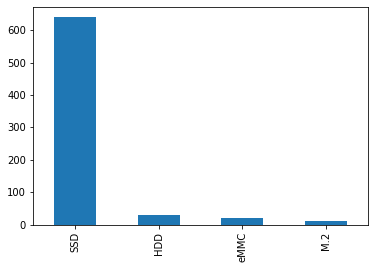

In [226]:
df["Тип накопителя"].value_counts().plot(kind='bar')

<div class="alert alert-success">
<b> ✔️ Количество категорий в "Тип накопителя" удалось уменьшить до разумного. Большинство подозрительных значений удалось заполнить правильно с помощью поисковика <br> 
    </b> </div>

### Общие характеристики

In [227]:
df["Операционная система"].describe()

count        787
unique        60
top       Без ОС
freq          76
Name: Операционная система, dtype: object

In [228]:
df["Операционная система"].unique() #опять слишком много категорий! ! ! 

array(['Windows', 'Windows 11', 'нет', 'Windows 11 Home', 'macOS',
       'Windows 10 Pro', 'noOS', 'Windows 10 Home', 'Windows 10 Домашняя',
       'Windows Pro', 'Windows 10 Home SL', 'Без ОС', 'не установлена',
       'NoOC', nan, 'DOS', 'Windows 10', 'Windows 10 Home (x64) SL',
       'Windows 11 Pro', 'Win10', 'Free DOS', 'Dos',
       'Windows 10 Home Single Language', 'Win10Pro', 'FreeDOS',
       'WIN10 Pro', 'без', 'Windows Home', 'no OS', 'WIN11 Pro',
       'Linux Endless', 'Mac OS Monterey', 'Win11Pro', 'WIN11',
       'Windows 11 Домашняя', 'Не установлена',
       'Windows 11 Home Single Language', 'Win 10', 'Windos 10 Home',
       'нет; отсутствует', 'Microsoft Windows 11', 'Без системы',
       'Microsoft Windows 11 Home', 'Linux', 'DOS / без ОС',
       'Windows 10 Home Microsoft Office Home', 'Win11', 'linux',
       'отсутствует', 'Нет', 'Windows 10 Professional', 'Win 11',
       'DOS; DOS / без ОС', 'DOS / без ОС; DOS', 'без ОС',
       'Windows; Windows 10', 'End

In [229]:
df["Операционная система"].value_counts() #опять ручная работа!

Без ОС                                                     76
Windows                                                    74
macOS                                                      67
Windows 10 Pro                                             59
DOS                                                        57
Windows 10 Home                                            52
Windows 11 Home                                            48
noOS                                                       46
нет                                                        37
Windows 11                                                 28
Windows 10                                                 28
не установлена                                             22
Free DOS                                                   20
Windows Home                                               16
Linux                                                      15
Без системы                                                15
без ОС  

In [39]:
without_os = ['no OS', 'Нет', 'Отсутствует', 'отсутствует', 'нет; отсутствует', 'Не установлена', 'без ОС', 'Без системы', 'не установлена', 'нет', 
              'noOS', 'Без ОС', 'без', 'NoOC', 'DOS; DOS / без ОС', 'DOS / без ОС; DOS', 'DOS / без ОС', 'Dos', 'DOS', 'Free DOS', 'FreeDOS']
df["Операционная система"] = df["Операционная система"].apply(lambda x: 'no_os' if x in without_os else x)

linux_based = ['Linux', 'linux', 'Endless OS', 'Linux Endless']
df["Операционная система"] = df["Операционная система"].apply(lambda x: 'linux_based' if x in linux_based else x)

mac_os = ['macOS', 'Mac OS Monterey']

df["Операционная система"] = df["Операционная система"].apply(lambda x: 'mac_os' if x in mac_os else x)

df["Операционная система"] = df["Операционная система"].apply(lambda x: 'win' if 'win' in str(x).lower() else x)
df["Операционная система"].value_counts()

win                                                        384
no_os                                                      315
mac_os                                                      68
linux_based                                                 19
ноутбуки и компьютеры ноутбук операционная система HDR7      1
Name: Операционная система, dtype: int64

In [231]:
df[df["Операционная система"]=='ноутбуки и компьютеры ноутбук операционная система HDR7']

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Версия операционной системы,Модель,Гарантийный срок,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
889,игровой ноутбук Lenovo v 15,23,55910,ноутбук офис,0,0,RADOST-SHOP,2.0,8 отзывов на товары,2.4,2.0,AMD Athlon ноутбук игровой нетбук,ноутбук офис Intel Core I3 1005G1,2 кг,ноутбук электроника корпус компьютерный; AMD,ноутбук офис ноутбуки ноутбук Lenovo,HDD,ноутбуки и компьютеры ноутбук операционная сис...,Free DOS; ноутбук; офис,ноутбук ноутбук игровой офис Lenovo v15,6 месяцев,ноутбук Lenovo компьютер TN,15.6,NaN,ноутбуки игровой ноутбук разрешение экрана 192...,офис нетбук ноутбук частота обновления высокий,35,6,NaN,NaN,4,нетбук ноутбук офис DDR4,4G LTE,игровой ноутбук нетбук видеокарта интегрированный,игровой ноутбук AMD Radeon Graphics,1000 Гб,NaN,NaN,NaN,NaN,NaN,NaN,ноутбук электроника офис игровой ноутбук HDMI ...,NaN,NaN,NaN,NaN,NaN,NaN,1 Тб; 1000 Гб,NaN,NaN,10240 Мб; для ноутбука; электроника ноутбук


In [232]:
raw_data.iloc[889]['Ссылка'] #free dos OS

'https://www.wildberries.ru/catalog/103116951/detail.aspx?targetUrl=BP'

<AxesSubplot:>

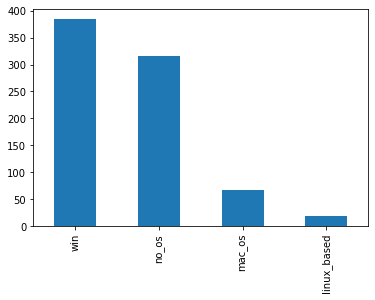

In [40]:
df.at[889, "Операционная система"] = 'no_os'
df["Операционная система"].value_counts().plot(kind='bar')

In [234]:
df["Операционная система"].isna().mean()

0.11672278338945005

<div class="alert alert-success">
<b>✔️ Количество категорий уменьшили до разумных значений</b> </div>

In [235]:
df["Версия операционной системы"].value_counts()

Windows 11 Home        69
Windows 10 Pro         67
Без ОС                 53
Windows 10 Home        47
noOS                   47
                       ..
Mac OS                  1
Без OS                  1
Windows 11 Домашняя     1
Window 11 HOME          1
Windows 10;             1
Name: Версия операционной системы, Length: 66, dtype: int64

In [236]:
df["Версия операционной системы"].unique() #по смыслу дублирующий столбец столбца "Операционная система". При этом тут больше пропусков. 

array(['Windows 10 Pro', 'Windiws 11', 'Windows 11', 'Windows 11 Home',
       'нет', nan, 'Windows 10 Home', 'DOS', 'Windows 10 Home 64',
       'Не установлена', 'noOC', '11', 'Без ОС', 'Windows 10', 'noOS',
       'UEFI Shell', 'Windows 10 Home SL', 'Windows 10 Домашняя',
       'Windows 11 Pro', 'Linux', 'macOS Big Sur',
       'Microsoft Windows 10 Home', 'Microsoft Windows 10 Professional',
       'WIN10', 'FreeDOS', 'Linux Endless', 'macOS', 'NoOS', 'Win11Pro',
       'WIN11', 'Windows 11 Professional', 'Windows 10 Professional',
       'Windows 11 Домашняя', 'Home', 'отсутствует', 'Window 11 HOME',
       'Free DOS', 'нет; отсутствует', 'W11', 'Windows 10 64-bit',
       'Без системы', 'Microsoft Windows 11 Home', 'Windows 10 trial',
       'Без OS', 'Mac OS', 'Windows Home', 'Win 11', 'W10', '11 Home',
       'Windows Pro', '10', 'windows', 'windows 10 home single language',
       '10 Home', '10 Home Single Language',
       'Ubuntu® 20.04 LTS, 64-разрядная', 'DOS; DOS / без 

In [41]:
df['Операционная система'].fillna(df['Версия операционной системы'], inplace=True)
df["Операционная система"].isna().mean()

0.08754208754208755

In [42]:
# Оставшиеся NaN по столбцу "Операционная система" заполним значением 'no_os'
df["Операционная система"] = df["Операционная система"].fillna('no_os')

In [43]:
df.drop(columns=["Версия операционной системы"], inplace=True)

<div class="alert alert-success">
<b>✔️ Столбец "Версия операционной системы" удалили, пропуски в "Операционной системе" заполнили значением 'no_os' </b> </div>

In [44]:
df["Модель"].nunique() #очень много уникальных значений. Посмотрим на топ самых продаваемых моделей.

604

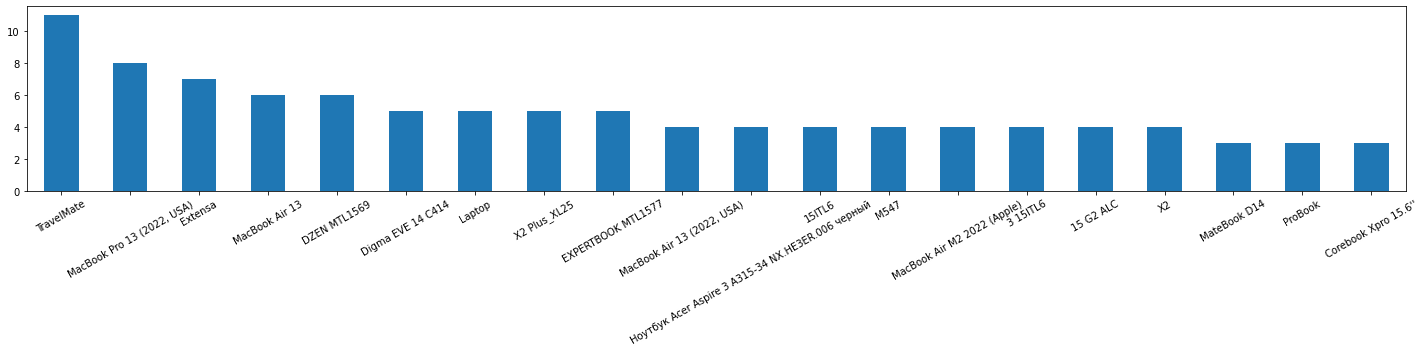

In [241]:
plt.figure(figsize=(20,5))
df["Модель"].value_counts().sort_values(ascending=False)[:20].plot(kind='bar')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
#удаляем столбец

In [45]:
df.drop(columns=["Модель"], inplace=True)

In [243]:
df["Гарантийный срок"].value_counts()

1 год                                         438
12 месяцев                                     95
12 мес                                         81
12 мес.                                        68
2 года                                         11
3 года                                         11
Гарантия завода-изготовителя                    7
12 Месяцев                                      4
6 месяцев                                       3
1год                                            3
1                                               3
СЦ Пр.                                          2
Гарантия 1 год                                  1
30 дней при сохранности товара и упаковки       1
30 дней при сохранности товара и упаковки.      1
1 год ( 12 месяцев )                            1
36 мес                                          1
12 мес. гарантия от производителя               1
3года                                           1
1 год от Сервиса ASUS                           1


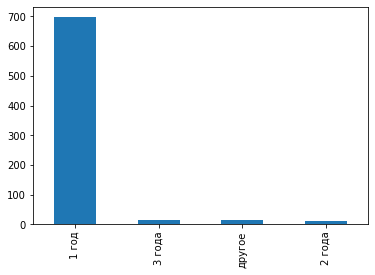

In [244]:
one_year = ['1 год', '12 месяцев','12 мес', '12 мес.', '12 месяцев',  '1 год от Сервиса ASUS', 
            '1 год ( 12 месяцев )', 'Гарантия 1 год', '12 Месяцев', '1', '1год', '12 мес. гарантия от производителя', '12 месяцев;']

df["Гарантийный срок"] = df["Гарантийный срок"].apply(lambda x: '1 год' if x in one_year else x)

three_years = ['3 Года (36 месяцев)', '36 мес', '3года', '3 года']
df["Гарантийный срок"] = df["Гарантийный срок"].apply(lambda x: '3 года' if x in three_years else x)

other = ['Гарантия завода-изготовителя', '6 месяцев', 'СЦ Пр.', '30 дней при сохранности товара и упаковки.', '30 дней при сохранности товара и упаковки']
df["Гарантийный срок"] = df["Гарантийный срок"].apply(lambda x: 'другое' if x  in other else x)
df["Гарантийный срок"].value_counts().plot(kind='bar')

In [46]:
df.drop(columns=["Гарантийный срок"], inplace=True)

<div class="alert alert-info"> <b>Большинство ноутбуков имеет гарантию в один год. Столбец удалили.
    </b></div>

### Экран

In [246]:
df["Тип матрицы"].describe()

count     752
unique     32
top       IPS
freq      525
Name: Тип матрицы, dtype: object

In [247]:
df["Тип матрицы"].value_counts()

IPS                                  525
TN                                   108
TN+film                               31
OLED                                  27
TFT IPS                               10
IPS (LED)                              6
ips                                    6
IPS (LED) матовая                      5
LED                                    3
WVA                                    3
VA                                     3
IPS; IPS (LED); IPS (LED) матовая      2
IPS (LED); IPS; IPS (LED) матовая      2
SVA                                    2
LCD                                    2
oled                                   1
IPS (LED); IPS (LED) матовая; IPS      1
TN film                                1
IPS; IPS (LED)                         1
tn+film                                1
ноутбук Lenovo компьютер TN            1
FHD+                                   1
IPS; 144 Hz                            1
IPS; 16"                               1
Ips             

<div class="alert alert-info"> <b> Выделим основные типы экранов: IPS, TN, OLED </b></div>

In [47]:
df["Тип матрицы"] = df["Тип матрицы"].apply(lambda x: 'IPS' if 'ips' in str(x).lower() else x)
df["Тип матрицы"] = df["Тип матрицы"].apply(lambda x: 'TN' if 'tn' in str(x).lower() else x)
df["Тип матрицы"] = df["Тип матрицы"].apply(lambda x: 'OLED' if 'oled' in str(x).lower() else x)
df["Тип матрицы"].value_counts()

IPS                   566
TN                    143
OLED                   28
LED                     3
WVA                     3
VA                      3
LCD                     2
SVA                     2
Intel UHD Graphics      1
FHD+                    1
Name: Тип матрицы, dtype: int64

In [48]:
""" На основе данных сайта  https://hpc.by/monitor-matrix-types/ обобщены остальные мелкие катеогрии  """

df["Тип матрицы"] = df["Тип матрицы"].apply(lambda x: 'TN' if x in ['WVA', 'SVA'] else x)
df["Тип матрицы"].value_counts()

IPS                   566
TN                    148
OLED                   28
LED                     3
VA                      3
LCD                     2
Intel UHD Graphics      1
FHD+                    1
Name: Тип матрицы, dtype: int64

In [49]:
df[df['Тип матрицы'] == 'LED']['Наименование']
# 260 - IPS
#409 - IPS
#425 - IPS

260    Ультрабук Swift 3 Core i5 1135G7 8Gb SSD512Gb ...
409       Ультрабук Aspire 5 A315-58-312A (NX.ADDER.01C)
425                         Ноутбук Laptop X515EABD1949W
Name: Наименование, dtype: object

In [50]:
for index in [260, 409, 425]:
    df.at[index, 'Тип матрицы'] = 'IPS'

In [51]:
df.at[df[df['Тип матрицы'] == 'Intel UHD Graphics'].index[0], 'Тип матрицы'] = 'TN'
df.at[df[df['Тип матрицы'] == 'FHD+'].index[0], 'Тип матрицы'] = 'IPS' 
df.at[83, 'Тип матрицы'] = 'TN'
df.at[822, "Тип матрицы"] = 'TN'
# ПОГУГЛИЛ

<AxesSubplot:>

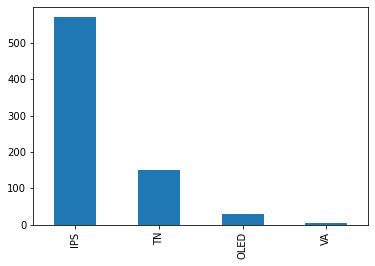

In [52]:
df["Тип матрицы"].value_counts().plot(kind='bar')


<div class="alert alert-success">
<b>✔️Количество категорий удалось сократить. Пришлось много гуглить и искать добавлять информацию вручную </b> </div>

In [254]:
df["Диагональ экрана"].describe()

count      871
unique      81
top       15.6
freq       182
Name: Диагональ экрана, dtype: object

In [255]:
df["Диагональ экрана"].unique() # ААААААААААААААА!!!!!

array(['14', '15.6', '15.6"', '15,6', '15"', '16.2"', '13.5', '15,6"',
       '15.6 "', '14.2"', '13,5"', '15.6; 15,6"', '13.9"', '14"', '14 "',
       '16', '15.6 дюйм', '13.6"', '11.6', "15.6''", '17.3', "13.3''",
       '17,3"', '15,6 "', '13.3"', nan, '16.1"', "17.3''", '16"', '14.0',
       '13.3', '16.1', '16.2', '17.3"', '13.3 "', "16''", '13.4"',
       '13.3(2560x1600)', '14.5', "14''", '15.6"; 15.6', '14 дюйм',
       '14.1"', '15.6; 15.6"', '16.0"', '14"(35.5 см)', '16,1',
       "16''; 2560х1600; 2.5K", '14.2 дюйм', '15,6″ - 39,62 см', '15',
       '15`6', '15,6 дюймов', '14 дюймов', '14.0 "', '16.1; 40.9 см',
       '17.3 дюймов', '13.9', "15.6 ''", '11,6', '13.3 дюйм', '11.6 дюйм',
       '14.0"', '13"', '15.6; 15.6 "; 15.6 дюйм', '13',
       '15.6 "; 15.6 дюйм; 15.6', "14.0 ''", "17.3 ''",
       '13.3 "; 13.3"; 13.3', '13.3; 13.3"; 13.3 "',
       '15.6 дюйм; 15.6; 15.6 "', '15.6"; 15.6 "; 15.6', "13.3 ''",
       '14 дюйм; 14; 14 "', '11.6 "', "11.6 ''", '1920x1080 Fu

In [53]:
#отфильтруем слово дюйм
df["Диагональ экрана"] = df["Диагональ экрана"].apply(lambda x: x[:3].strip() if 'дюйм' in str(x) else x)
df["Диагональ экрана"].unique()

array(['14', '15.6', '15.6"', '15,6', '15"', '16.2"', '13.5', '15,6"',
       '15.6 "', '14.2"', '13,5"', '15.6; 15,6"', '13.9"', '14"', '14 "',
       '16', '15.', '13.6"', '11.6', "15.6''", '17.3', "13.3''", '17,3"',
       '15,6 "', '13.3"', nan, '16.1"', "17.3''", '16"', '14.0', '13.3',
       '16.1', '16.2', '17.3"', '13.3 "', "16''", '13.4"',
       '13.3(2560x1600)', '14.5', "14''", '15.6"; 15.6', '14.1"',
       '15.6; 15.6"', '16.0"', '14"(35.5 см)', '16,1',
       "16''; 2560х1600; 2.5K", '14.', '15,6″ - 39,62 см', '15', '15`6',
       '15,', '14.0 "', '16.1; 40.9 см', '17.', '13.9', "15.6 ''", '11,6',
       '13.', '11.', '14.0"', '13"', '13', "14.0 ''", "17.3 ''",
       '13.3 "; 13.3"; 13.3', '13.3; 13.3"; 13.3 "',
       '15.6"; 15.6 "; 15.6', "13.3 ''", '11.6 "', "11.6 ''",
       '1920x1080 Full HD', '39,6 cm (15.6")', '14;'], dtype=object)

In [54]:
strange_values = {'13.3(2560x1600)': '13.3',
                  '14"(35.5 см)': '14',
                  "16''; 2560х1600; 2.5K": '16', 
                  '39,6 cm (15.6")': '15.6',
                  '15,6″ - 39,62 см': '15.6',
                  '16.1; 40.9 см': '16.1', 
                  '39,62 см': '15.6',
                  '15.6"; 15.6 "; 15.6': '15.6',
                  '13.3; 13.3"; 13.3 "': '13.3',
                  '13.3 "; 13.3"; 13.3': '13.3',
                  '15.6; 15.6"': '15.6', 
                  '15.6"; 15.6':'15.6', 
                  '15.6; 15,6':'15.6',
                  '15.6; 15,6"': '15.6',
                  '15.6; 15.6': '15.6',
                  '15`6': '15.6',
                  '11.':'11', 
                  '13.': '13', 
                  '15,':'15'}

df["Диагональ экрана"] = df["Диагональ экрана"].apply(lambda x: strange_values[x] if x in strange_values.keys() else x)
df["Диагональ экрана"].unique()

array(['14', '15.6', '15.6"', '15,6', '15"', '16.2"', '13.5', '15,6"',
       '15.6 "', '14.2"', '13,5"', '13.9"', '14"', '14 "', '16', '15.',
       '13.6"', '11.6', "15.6''", '17.3', "13.3''", '17,3"', '15,6 "',
       '13.3"', nan, '16.1"', "17.3''", '16"', '14.0', '13.3', '16.1',
       '16.2', '17.3"', '13.3 "', "16''", '13.4"', '14.5', "14''",
       '14.1"', '16.0"', '16,1', '14.', '15', '14.0 "', '17.', '13.9',
       "15.6 ''", '11,6', '13', '11', '14.0"', '13"', "14.0 ''",
       "17.3 ''", "13.3 ''", '11.6 "', "11.6 ''", '1920x1080 Full HD',
       '14;'], dtype=object)

In [258]:
df[df['Диагональ экрана'] == '1920x1080 Full HD']
#850 - 15.6
#882 - 14 (гугл)
#883 - 15.6

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
850,Ноутбук компьютер,5,67660,Rayana Lenovo 15.6 дюйм,0,0,Rayana,3.2,6 отзывов на товары,2.4,2.0,AMD Athlon Silver 3050U,AMD Athlon Silver 3050U,1.85 кг,NaN,NaN,HDD,no_os,TN,1920x1080 Full HD,NaN,1366x768,60 Гц,NaN,NaN,NaN,NaN,4,DDR4,NaN,AMD Radeon Graphics,AMD Radeon Graphics,1000 Гб,NaN,NaN,NaN,NaN,NaN,2 см,HDMI 1.4b x1,NaN,NaN,NaN,NaN,NaN,NaN,1000 Гб,NaN,NaN,NaN
882,Ноутбук компьютер,30,73571,СУЛТАН/Ноутбук Lenovo IdeaPad 3 ADA05,0,0,Айткулова,5.0,2 отзыва на товары,2.4,2.0,AMD Athlon Silver 3050U,AMD Athlon Silver 3050U,1.85 кг,NaN,NaN,NaN,no_os,NaN,1920x1080 Full HD,NaN,1366x768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMD Radeon Graphics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HDMI 1.4b x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,Ноутбук компьютер Lenovo IdeaPad 3 15ADA05 81W...,20,61500,KK STORE/Lenovo 15.6 дюйм,0,0,KK STORE,3.0,41 отзыв на товары,2.4,2.0,AMD Athlon Silver 3050U,AMD Athlon Silver 3050U,1.85 кг,NaN,NaN,HDD,no_os,TN,1920x1080 Full HD,NaN,1366x768,60 Гц,NaN,NaN,NaN,NaN,4,DDR4,NaN,AMD Radeon Graphics,AMD Radeon Graphics,1000 Гб,NaN,NaN,NaN,NaN,NaN,NaN,HDMI 1.4b x1,NaN,NaN,NaN,NaN,NaN,NaN,1000 Гб,NaN,NaN,NaN


In [55]:
df.at[850, "Диагональ экрана"] = '15.6'
df.at[882, 'Диагональ экрана'] = '14'
df.at[883, 'Диагональ экрана'] = '15,6'
df["Диагональ экрана"] = df["Диагональ экрана"].apply(lambda x: str(x).strip("' 0"))
df["Диагональ экрана"] = df["Диагональ экрана"].apply(lambda x: str(x).strip('" ;0'))
df["Диагональ экрана"] = df["Диагональ экрана"].apply(lambda x: str(x).replace(',','.'))
df["Диагональ экрана"].unique()

array(['14', '15.6', '15', '16.2', '13.5', '14.2', '13.9', '16', '15.',
       '13.6', '11.6', '17.3', '13.3', 'nan', '16.1', '14.', '13.4',
       '14.5', '14.1', '16.', '17.', '13', '11'], dtype=object)

In [56]:
df["Диагональ экрана"] = df["Диагональ экрана"].apply(lambda x: float(x))
#df["Диагональ экрана"].info()

<div class="alert alert-success">
<b>✔️ Столбец успешно преобразован к типу данных float 64</b> </div>

In [261]:
df["Разрешение экрана"].unique()

array(['1366x768', '2160×1440', '2160 × 1440', '3200x1800', nan,
       '1920x1080', '1920х1080', '3456x2234', '1920 х 1080', '1920*1080',
       '3024x1964', '3000х2000', '1920 x 1080', '1366 x 768',
       '1920х1200(FullHD+)', '2560x1664', '1980x1080',
       '2.8K (2880 x 1800) OLED', '3840x2160', '2.8K (2880 x 1800)',
       '2560x1600', '2880 x 1620', 'Full HD (1920x1080)', '1600x900',
       '1920х1200', '2560х1600', 'Uhd', '2880х1800', '1920 x 108',
       'FHD (1920 x 1080)', '1920x1280', '3456 x 2234', '3840x2400',
       '1920x1200', '2880x1800', '1920 x 1200', '1920х1080; 920x1080',
       '2560 x 1600', '1920x1080 пикс./ 14"', '1920 * 1080FHD',
       'Full HD IPS (1920x1080)', '2.5K 165Hz', '15.6', '1366*768',
       '3000 x 2000', '1920x1080 (Full HD)', '2160x1440', '3200х2000',
       '2560x1440', '2560*1440', '3456 x 2160', '2560х1600; 2.5K 165Hz',
       '1920X1080', '1600x900 HD+', '1080', '1920', '1920x1080 (FULLHD)',
       'FHD-дисплей разрешение 1920 x 1080', '21

In [262]:
df["Разрешение экрана"].value_counts()

1920x1080                             363
1920 x 1080                            75
1920х1080                              56
2560x1600                              35
1920 х 1080                            32
                                     ... 
1920                                    1
FHD-дисплей разрешение 1920 x 1080      1
2160 x 1440                             1
3840 х 2160                             1
1920х1080 Full HD, 16:9;                1
Name: Разрешение экрана, Length: 94, dtype: int64

In [57]:
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '1368x768' if '1280' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '1368x768' if '1368' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '1368x768' if '1366' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '1600x900' if '1600' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '1920x1080' if '1920' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '1920x1080' if '1980' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '2160x1440' if '2160' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '2160x1440' if '2240' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '2560x1600' if '2560' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '2880x1800' if '2880' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '2880x1800' if '3000' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '3024x1964' if '3024' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '3024x1964' if '3200' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '3456x2234' if '3456' in str(x) else x)
df["Разрешение экрана"] = df["Разрешение экрана"].apply(lambda x: '3840x2160' if '3840' in str(x) else x)
df["Разрешение экрана"].value_counts()

1920x1080     611
1600x900       58
1368x768       51
2560x1600      35
2880x1800      18
2160x1440      12
3024x1964      11
3456x2234       2
Uhd             1
3840x2160       1
2.5K 165Hz      1
15.6            1
1080            1
15.6"           1
Name: Разрешение экрана, dtype: int64

In [58]:
df[df['Разрешение экрана'] == 'Uhd']

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
193,Ноутбук,15,32600,Ноутбук ASUS,0,0,Койнов,3.8,172 отзыва на товары,2.4,2.0,Intel Celeron N4020,Intel Celeron N4020,NaN,Intel,NaN,NaN,no_os,NaN,15.6,NaN,Uhd,NaN,NaN,NaN,NaN,NaN,8Gb,NaN,NaN,NaN,NaN,256 Гб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UHD Graphics 600


In [265]:
raw_data.iloc[193]['Ссылка'] 

'https://www.wildberries.ru/catalog/136768574/detail.aspx?targetUrl=BP'

In [266]:
df[df['Разрешение экрана'] == '2.5K 165Hz']

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
494,Ноутбук Redmibook Redmi G i7 16'' 2.5K 165Hz R...,0,105590,Xiaomi,0,0,AFITRON.RU,4.6,2 198 отзывов на товары,3.5,10.0,Intel Core i7 12650H,Intel,3.2 кг,NVIDIA,NaN,SSD,win,IPS,16.0,NaN,2.5K 165Hz,165 Гц,"55,02 Wh",NaN,Есть,Есть,16 ГБ,"16 ГБ, DDR5, 4800 МГц",Wi-Fi; Bluetooth V5.2,дискретная,NVIDIA GeForce RTX 3050 - 4096 Мб,512 Гб,есть,NaN,есть,Есть,NaN,26.11 см,USB 2.0; USB 3.0 х3; Thunderbolt 4,есть,NaN,Стереодинамики,NaN,Есть,NaN,NaN,Redmi G; Redmibook,NaN,4096 мб


In [267]:
df[df['Разрешение экрана'] == '15.6']

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
495,Ноутбук Lenovo IdeaPad 3 15ADA05,45,73000,САФИЯ,0,0,Сафия,0.0,0 отзывов на товары,2.3,2.0,AMD Athlon,AMD Athlon Silver 3050U,1.85 кг,NaN,NaN,HDD,no_os,IPS,15.6,NaN,15.6,NaN,35 Вт\ч,7.3,1 шт,SD; SDHC; SDXC,4,DDR 4,"WiFi (802.11 b/g/n/ac) 2x2, Bluetooth 5.0",Интегрированная,AMD Radeon Graphics,NaN,2 шт,NaN,NaN,NaN,4 Мб,2 см,встроенный,1 шт,NaN,NaN,NaN,NaN,NaN,1000 Гб,IdeaPad 3,1,NaN


In [268]:
df[df['Разрешение экрана'] == '1080']

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
609,"Ноутбук DZEN MTL1569,цвет серебристый",5,57885,HIPER,0,0,Позитроника,4.5,25 887 отзывов на товары,2.4,4.0,Intel Core i5 1135G7,Intel Core i5 1135G7,NaN,NaN,"Ноутбук-1шт.,инструкция-1шт.,гарантийный талон...",NaN,win,IPS,15.6,NaN,1080,NaN,NaN,NaN,NaN,NaN,8,NaN,Поддержка технологии Bluetooth,Intel Iris Xe graphics,NaN,256 гб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
df[df['Разрешение экрана'] == '15.6\"']

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Частота обновления,Емкость аккумулятора,Время работы от аккумулятора,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
760,Игровой ноутбук TUF Gaming Dash F15 2022 FX517...,10,132000,Asus,0,0,На Связи,4.5,547 отзывов на товары,3.3,8.0,intel core i5,Intel Core i5 12450H,2 кг,NVIDIA,"ноутбук, адаптер питания, документация",SSD,no_os,IPS,15.6,матовая,"15.6""",144 Гц,76 Вт·ч,NaN,1,нет,16 гб,DDR5,Bluetooth 5.2; Wi-Fi 802.11ac (Wi-Fi 6),дискретная,NVIDIA GeForce RTX 3050 4 ГБ,512 гб,2,1,NaN,2,NaN,2.07 см,PCIe,NaN,NaN,NaN,NaN,1 Gbit,отсутствует,NaN,NaN,2 шт,4 гб


In [60]:
# сверившись с каталогом, примем значения Uld, 15.6, 2.5К и 1080 как 1920x1080
df.at[193, "Разрешение экрана"] = '1920x1080'
df.at[494, "Разрешение экрана"] = '1920x1080'
df.at[495, "Разрешение экрана"] = '1920x1080'
df.at[609, "Разрешение экрана"] = '1920x1080'
df.at[760, "Разрешение экрана"] = '1920x1080'

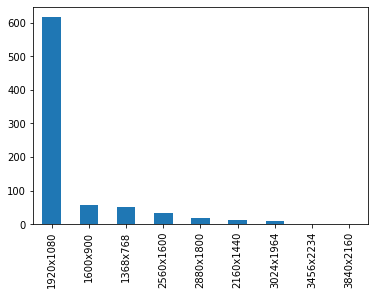

In [271]:
df['Разрешение экрана'].value_counts().plot(kind='bar')

<div class="alert alert-danger">
<b>Сократили количество значений по столбцу "Разрешение экрана" </b>  </div>


In [272]:
df["Частота обновления"].unique()

array(['60 Гц', nan, '144 Гц', '60', '360 Гц', '120 Гц',
       'Частота обновления экрана 60 гц', '144 Ггц', '90 Гц', '90',
       'LPDDR5', '2600 МГц', '60  Гц', '120 Hz', '360', '3200 МГц',
       '3200', '60Hz', '60; 60 Гц', '165 Гц', '144; 144 Гц', '60Гц',
       '144', '165Гц', '120Гц', '60 гц', '60 Гц.', '4.5 МГц', '2000 МГц',
       '3300', '120', '60 Гц; 60 Гц.; 60', '144 Гц; 144', '4800 МГц',
       '60; 60 Гц; 60 Гц.', '60 Гц.; 60; 60 Гц', '60 Гц; 60; 60 Гц.',
       '2.3 ГГц', '60 Hz',
       'офис нетбук ноутбук частота обновления высокий'], dtype=object)

In [273]:
df["Частота обновления"].isna().mean() # пропущена половина! проще удалить данный столбец

0.4287317620650954

In [61]:
df.drop(columns=["Частота обновления"], inplace=True)

### ПИТАНИЕ

In [275]:
df['Емкость аккумулятора'].unique()

array(['4500 мА*ч', '6952 мАч / 54 Вт·ч', nan, '5000 мА*ч', '5000 mAh',
       '45 Вт*ч', '35 Вт*час', '99 Вт*час', '5000 мАч', '50 Wh', '41',
       '37 Вт*ч', '57 Втч', '50 Вт*ч', '5400 mAh', '4000 mAh; 4000 мАч',
       '50 мА*ч', '6\xa0000 mAh', '4000 мА*ч', '36.7 Вт*ч', '4000 mAh',
       '4500 mAh', '37 Вт*час', '57 Вт*ч', '32 Вт*ч', '41 Втч', '36 Вт*ч',
       '3600 mAh', '8000 мАч', '45 Вт*час', '75 вт*час', '50 Втч',
       '56 Вт*ч', '4330mAh', '50 Вт·ч', '4810 мА*ч', '42 Wh', '48 Вт*ч',
       '36 Вт*час', '4000', '41 Вт*ч', '67 Вт*ч', '38 Вт-ч', '36.7 Втч',
       '5000мА/ч 11.4В', '75 Вт*ч', '53 Вт*ч', '36,7 Вт*ч', '38 Вт*ч',
       '60 Вт*ч', '70 Вт*Ч', '4810 mAh', '3900 мА*ч', '3920 мАч', '100',
       '71 Вт*час', '71 Вт*ч', '6500 мА*ч', '45 Вт-ч', '52 Вт*ч',
       '45 Втч', '47 Вт*ч', '58 Вт*ч', '7330 mAh', '6700 мА*ч',
       '3220 мА*ч', '50WHrs', '38 Вт*час', '42 Вт*час', '37WHrs',
       '4810 мА·ч', '35 Втч', '41 Вт·ч', 'Li-Ion, 4810 мАч, 37 Втч',
       '3665 ма

In [276]:
df['Емкость аккумулятора'].isna().mean() # данные интересные, но более 50% пропусков, два формата данных, нет смысла оставлять столбец.

0.5162738496071829

<div class="alert alert-danger">
<b>❌: 
Обычно в ноутбук с топовыми характеристиками всегда ставят аккумулятор получше, то есть корреляция этого признака с другими будет достаточно высокой.</b> </div>

In [277]:
df["Время работы от аккумулятора"].unique()

array(['до 4 часов', 'до 11 часов', 'до 12 часов', 'до 5 часов', nan,
       '9 часов', '7.5 ч', '21 ч', '5 часов', '17 ч', '4 ч', '7 ч',
       '8 часов', '10 часов', '10,5 ч', '16 ч', '4 ч 30 мин', '18 ч',
       '6 часов', '9 ч', '8 ч', '5, час', '15 ч', '5 ч', '9, час',
       '7 часов', '4,5 часа', '10, час', '5.5 часов', '11.5 часов',
       '11 ч', '6.5 часов', '12 ч', '6.5, час', '20 ч', '11 часов', '20',
       '15 часов', '6 ч', '7.5, час', '6 ч.', '13 часов', '6, час', '5.4',
       '12 часов', '21', '18', 'от 15 до 18 ч', '14 часов', '12.5, час',
       '11 ч 30 мин', '13 ч', '7.4 ч', '7.3, час', '12.2, час',
       'до 6.5 ч', '615 минут', '6', '7.4, час', '12, час', '13.2 ч',
       '5.5, час', '6.5', 'до 8 ч', '486 мин', '13,5 ч', '4 часа',
       '5.5 ч', '6,5ч.', '8.75 часов', '7.3', '17 часов', '13', '9,6 ч',
       '5.5', '6.7 ч', '8 часов 45 минут', '3', '16 часов', '4',
       '7 часов 30 минут', '7.15 часов', '9.3 часа', '7,5 ч', '8',
       '18 часов', '7,5 часа'

In [278]:
df["Время работы от аккумулятора"].isna().mean() 

0.5914702581369248

In [62]:
# Тоже довольно много пропусков, удаляем оба столбца по аккумулятору
df.drop(['Емкость аккумулятора', 'Время работы от аккумулятора'], axis= 1 , inplace= True )

###  Память

In [280]:
df["Объем оперативной памяти (Гб)"].unique()

array(['4', '8 ГБ', '16 ГБ', '8', '16', '12 ГБ', '4 ГБ', nan,
       '16 gb; 8 GB', '8 гб', '8 GB', '4 GB', '16 гб', '32', '6 ГБ',
       '8; 8 ГБ', '8Gb', '8Гб', '16ГБ', '16 Гб', '32 ГБ', '20 Гб',
       '4, ГБ', '2 ГБ', '4Гб', '12', '4 гб', '24', '8 Гб', '16 гб; DDR4',
       '64', '16.0 ГБ', '4ГБ', '4.0гб', '4 (DDR4); 4 GB; 4',
       '16; 16 ГБ; 16 gb', '8 ГБ; 8; 8 GB', '8 GB; 8; 8 ГБ',
       '8 GB; 8 ГБ; 8', '16 gb', '8; 8 GB; 8 ГБ', '16 gb; 16 ГБ; 16',
       '8 ГБ; 8 GB; 8', '4 GB; 4; 4 (DDR4)', '8 ГБ / DDR4', '1000 Гб',
       '4.0', '8.0 Гб', '8 GB;'], dtype=object)

In [281]:
df["Объем оперативной памяти (Гб)"].isna().mean() #работаем с этим столбцом

0.05948372615039282

In [282]:
df["Объем оперативной памяти (Гб)"].value_counts()

8 ГБ                 264
8                    118
16 ГБ                105
4 ГБ                  93
16                    56
4                     50
8 GB                  24
8 гб                  21
4 GB                  12
16 гб                 12
8 Гб                  11
12 ГБ                  9
16 Гб                  7
64                     5
6 ГБ                   5
4 гб                   4
32                     3
16 gb; 8 GB            3
8Гб                    2
4.0гб                  2
8; 8 ГБ                2
32 ГБ                  2
8; 8 GB; 8 ГБ          2
24                     2
8 GB; 8 ГБ; 8          1
16 gb                  1
16 gb; 16 ГБ; 16       1
4.0                    1
8 ГБ; 8 GB; 8          1
4 GB; 4; 4 (DDR4)      1
8 ГБ / DDR4            1
1000 Гб                1
8 ГБ; 8; 8 GB          1
8.0 Гб                 1
8 GB; 8; 8 ГБ          1
12                     1
16; 16 ГБ; 16 gb       1
4 (DDR4); 4 GB; 4      1
4ГБ                    1
16.0 ГБ                1


In [283]:
df[df['Объем оперативной памяти (Гб)'] == '16 gb; 8 GB'] 
# у ноутбуков Ноутбук Corebook Xpro 15.6'' IPS 144Hz Intle i5-10210U - 8 Гб оперативной памяти

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
33,Ноутбук Corebook Xpro 15.6'' IPS 144Hz Intle i...,0,49990,CHUWI,12,5,AFITRON.RU,4.6,2 198 отзывов на товары,1.6,4.0,i5,Intel Core i5-10210U (1.6 ГГц),1.78 кг,Intel,Инструкция - 1 шт; Гарантийный талон - 1 шт; З...,SSD,win,IPS,15.6,Матовая,1920x1080,1 шт,Есть,16 gb; 8 GB,DDR4,BT5.1; WIFI6 802.11ax1; WI-FI 2.4 GHz / 5 GHz,Интегрированная в процессор графика,UHD Graphics,1 TB; 512 GB,2 шт,NaN,NaN,1 шт,NaN,2.06 см,"USB 3.0 * 2 ; USB 2.0 * 1 ; 3,5 Jack; HDMI*1; ...",1 шт,есть,да,нет,есть,Нет,NaN,Corebook Xpro,NaN,NaN
96,Ноутбук Corebook Xpro 15.6'' IPS 144Hz Intle i...,0,45990,CHUWI,12,5,AFITRON.RU,4.6,2 198 отзывов на товары,1.6,4.0,i5,Intel Core i5-10210U (1.6 ГГц),1.78 кг,Intel,Инструкция - 1 шт; Гарантийный талон - 1 шт; З...,SSD,win,IPS,15.6,Матовая,1920x1080,1 шт,Есть,16 gb; 8 GB,DDR4,BT5.1; WIFI6 802.11ax1; WI-FI 2.4 GHz / 5 GHz,Интегрированная в процессор графика,UHD Graphics,1 TB; 512 GB,2 шт,NaN,NaN,1 шт,NaN,2.06 см,"USB 3.0 * 2 ; USB 2.0 * 1 ; 3,5 Jack; HDMI*1; ...",1 шт,есть,да,нет,есть,Нет,NaN,Corebook Xpro,NaN,NaN
498,Ноутбук Corebook Xpro 15.6'' IPS 144Hz Intle i...,6,43490,CHUWI,12,5,AFITRON.RU,4.6,2 198 отзывов на товары,1.6,4.0,i5,Intel Core i5-10210U (1.6 ГГц),1.78 кг,Intel,Инструкция - 1 шт; Гарантийный талон - 1 шт; З...,SSD,win,IPS,15.6,Матовая,1920x1080,1 шт,Есть,16 gb; 8 GB,DDR4,BT5.1; WIFI6 802.11ax1; WI-FI 2.4 GHz / 5 GHz,Интегрированная в процессор графика,UHD Graphics,1 TB; 512 GB,2 шт,NaN,NaN,1 шт,NaN,2.06 см,"USB 3.0 * 2 ; USB 2.0 * 1 ; 3,5 Jack; HDMI*1; ...",1 шт,есть,да,нет,есть,Нет,NaN,Corebook Xpro,NaN,NaN


In [63]:
df['Объем оперативной памяти (Гб)'] = df['Объем оперативной памяти (Гб)'].apply(lambda x: str(x).replace('DDR4', ''))
df["Объем оперативной памяти (Гб)"].value_counts()

8 ГБ                264
8                   118
16 ГБ               105
4 ГБ                 93
16                   56
nan                  53
4                    50
8 GB                 24
8 гб                 21
4 GB                 12
16 гб                12
8 Гб                 11
12 ГБ                 9
16 Гб                 7
64                    5
6 ГБ                  5
4 гб                  4
32                    3
16 gb; 8 GB           3
8Гб                   2
4.0гб                 2
8; 8 ГБ               2
32 ГБ                 2
8; 8 GB; 8 ГБ         2
24                    2
8 GB; 8 ГБ; 8         1
16 gb                 1
16 gb; 16 ГБ; 16      1
4.0                   1
8 ГБ; 8 GB; 8         1
4 GB; 4; 4 ()         1
8 ГБ /                1
1000 Гб               1
8 ГБ; 8; 8 GB         1
8.0 Гб                1
8 GB; 8; 8 ГБ         1
4Гб                   1
16; 16 ГБ; 16 gb      1
4 (); 4 GB; 4         1
4ГБ                   1
16.0 ГБ               1
16 гб;          

<AxesSubplot:>

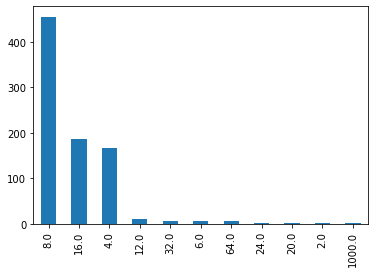

In [64]:
df.loc[df[df['Объем оперативной памяти (Гб)'] == '16 gb; 8 GB'].index, 'Объем оперативной памяти (Гб)'] = 8 #для этих ноутбуков 8 Гб оперативной памяти
df['Объем оперативной памяти (Гб)'] = df['Объем оперативной памяти (Гб)'].apply(lambda x: re.findall(r'\d+', str(x)))
df['Объем оперативной памяти (Гб)'] = df['Объем оперативной памяти (Гб)'].apply(lambda x: int(x[0]) if len(x)>0 else np.nan)
df["Объем оперативной памяти (Гб)"].value_counts().plot(kind='bar')

In [286]:
df[df['Объем оперативной памяти (Гб)'] == 1000]  # смотрим на выброс

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,seller_sales,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Беспроводные интерфейсы,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,Порт USB 3.x,Порт USB 4.x,Порт Thunderbolt,Порт USB-C,Кэш память,Толщина предмета,Интерфейс,Порт USB 2.0,Разъем M.2,Мультимедийные возможности,Разъем VGA,LAN разъем (RJ45),Оптический привод,Объем накопителя HDD,Серия ноутбуков,Количество слотов оперативной памяти,Объем памяти видеоадаптера
869,Ноутбук Lenovo IdeaPad L3 R541TUN,0,67000,Tayab,0,0,Шынар,3.8,8 отзывов на товары,2.4,4.0,AMD Ryzen 5 3500U,AMD Ryzen 5 3500U,NaN,SMA,1шт,NaN,no_os,TN,15.0,NaN,1920x1080,NaN,NaN,1000.0,4.0 гб,NaN,AMD Radeon Vega 8,дискретная видеокарта,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USB Type-C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.at[869, "Объем оперативной памяти (Гб)"] = 1.0

In [66]:
df["Объем оперативной памяти (Гб)"].info()

<class 'pandas.core.series.Series'>
Int64Index: 891 entries, 0 to 896
Series name: Объем оперативной памяти (Гб)
Non-Null Count  Dtype  
--------------  -----  
838 non-null    float64
dtypes: float64(1)
memory usage: 46.2 KB


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ Столбец обработан! </b></u></p>

In [289]:
df["Тип оперативной памяти"].describe()

count      689
unique      34
top       DDR4
freq       546
Name: Тип оперативной памяти, dtype: object

In [290]:
df["Тип оперативной памяти"].value_counts()

DDR4                                                 546
LPDDR4x                                               23
SO-Dimm                                               21
DDR5                                                  18
LPDDR4                                                17
SO-DIMM                                                9
DDR3                                                   9
LPDDR3                                                 5
DDR4; SO-DIMM                                          5
8ГБ DDR4 2666МГц                                       4
4 ГБ                                                   3
DDR 5                                                  2
LPDDR5                                                 2
SMA                                                    2
DDR 4                                                  2
4266 МГц LPDDR4c                                       2
16 ГБ, DDR5, 4800 МГц                                  2
4.0 гб                         


<div class="alert alert-warning">
<b> ⚠️ Определенно нужны преобразования</b>

### Связь

In [291]:
df["Беспроводные интерфейсы"].describe()

count                  728
unique                 160
top       Wi-Fi; Bluetooth
freq                   139
Name: Беспроводные интерфейсы, dtype: object

In [67]:
df["Беспроводные интерфейсы"] = df["Беспроводные интерфейсы"].apply(lambda x: str(x).lower())
df["Беспроводные интерфейсы"].unique()

array(['wi-fi; bluetooth', 'bluetooth 4.2, wifi (802.11ac)',
       '802.11 b/g/n; bluetooth 4.0', 'bluetooth; wi-fi',
       'bluetooth; wi-fi; realtek 8821ce wireless lan 802.11ac',
       'bluetooth 5.0; wi-fi 802.11ax', 'nan',
       'bluetooth 4.0; wi-fi (802.11 b/g/n)',
       '802.11 b/g/n; bluetooth 4.2; wi-fi',
       'bluetooth 5.1; wifi (802.11 b/g/n/ac)', 'blutooth; wi-fi',
       'wi-fi 802.11 a/b/g/n/ac; bluetooth 5.2', 'wi-fi. bluetooth.',
       'bt5.1; wifi6 802.11ax1; wi-fi 2.4 ghz / 5 ghz',
       'wi-fi 6(802.11ax) (dual band) 2*2 + bluetooth 5.0',
       'wi fi; blueooth', 'wi-fi; blutooth',
       'wifi (802.11 b/g/n); bluetooth 4.0',
       'wi-fi 6(802.11ax); bluetooth 5', 'bluetooth 5.0; wi-fi 802.11ac',
       'bluetooth 4.0; wifi (802.11 b/g/n)', 'wi-fi bluetooth',
       'wi-fi 2.4 ghz / 5 ghz; bluetooth 4.2',
       'bluetooth 4.2; 802.11 b/g/n/ac',
       'bluetooth 5.0; wi-fi 802.11 a/b/g/n/ac/ax',
       'wi‑fi 802.11ax; bluetooth 5.0',
       'bluetooth

<div class="alert alert-warning">
<b>⚠️: Практически все современные компьютеры имеют bluetooth и wifi, поэтому этот столбец можно удалить.</b>

In [68]:
df.drop("Беспроводные интерфейсы", axis=1, inplace=True)

### Видеокарта

In [294]:
df["Тип видеокарты"].unique()

array(['встроенная', 'Интегрированная', nan, 'Дискретная', 'UHD Graphics',
       'Интегрированная в CPU + дискретная', 'Intel UHD Graphics 600',
       'AMD Radeon Vega 8',
       'Интегрированная в процессор графика, Дискретная видеокарта',
       'Встроеная', 'Интегрирована в CPU', 'Qualcomm WCD9385',
       'дискретная', 'Интегрированная в процессор графика', 'Vega 6',
       'Intel HD Graphics 500', 'Intel Iris Xe Graphics',
       'Intel UHD Graphics 620', 'интегрированая', 'NVIDIA GeForce RTX',
       'Intel UHD Graphics G1', 'Radeon Graphics',
       'интегрированный (встроенный)', 'Дискретное',
       'Интегрированная; дискретная', 'NVIDIA', 'интегрированный',
       'Iris Xe Graphics', 'Интегрирована',
       'Интегрированная; Intel Iris Xe Graphics', 'Intel UHD Graphics',
       'Встроенная', 'Intel UHD Graphics 605', 'встроенная видеокарта',
       'AMD Radeon', 'NVIDIA GeForce RTX 3060', 'Apple M1 Pro 14-Core',
       'Дискретный', 'дискретная; интегрированная',
       'ин

In [295]:
df["Тип видеокарты"].describe()

count            706
unique            54
top       встроенная
freq             374
Name: Тип видеокарты, dtype: object

Решено поделить все видеокарты на 2 вида: встроенная и дискретная, т.к. дискретная карта обычно ставится для игровых целей и потому имеет значение для цены.

In [69]:
integrated = ['встроенная', 'Интегрированная', 'UHD Graphics', 'Intel UHD Graphics 600',
              'AMD Radeon Vega 8', 'Встроеная', 'Интегрирована в CPU',
              'Qualcomm WCD9385','Интегрированная в процессор графика', 'Vega 6',
              'Intel HD Graphics 500', 'Intel Iris Xe Graphics', 'Intel UHD Graphics 620',
              'интегрированая', 'Intel UHD Graphics G1', 'Radeon Graphics',
              'интегрированный (встроенный)', 'интегрированный','Iris Xe Graphics',
              'Интегрирована', 'Интегрированная; Intel Iris Xe Graphics', 
              'Intel UHD Graphics', 'Встроенная', 'Intel UHD Graphics 605', 'встроенная видеокарта'
              ,'AMD Radeon', 'Apple M1 Pro 14-Core', 'Intel Iris Xe graphics', 
              'Intel HD Graphics 600', 'AMD Radeon Graphics', 'AMD Radeon R2',
              'всроенная', 'встроенная видеокарта Intel UHD Graphics', 'AMD Radeon Vega',
              'игровой ноутбук нетбук видеокарта интегрированный', 'AMD Radeon Vega 3',
              'Встроенная;']
df["Тип видеокарты"] = df["Тип видеокарты"].apply(lambda x: 'integrated' if x in integrated else x)

Discrete = ['Дискретная', 'Интегрированная в CPU + дискретная', 'Интегрированная в процессор графика, Дискретная видеокарта',
            'дискретная', 'NVIDIA GeForce RTX', 'Дискретное',
            'Интегрированная; дискретная', 'NVIDIA', 
            'NVIDIA GeForce RTX 3060', 'Дискретный', 
            'дискретная; интегрированная', 'интегрированная и дискретная',
            'NVIDIA GeForce GTX 1650 Ti 4096МБ', 'дискретная; Интегрированная',
            'дискретный и встроенный', 'переключаемый (между встроенным и дискретным)',
            'AMD Radeon RX 640']
df["Тип видеокарты"] = df["Тип видеокарты"].apply(lambda x: 'Discrete' if x in Discrete else x)

<AxesSubplot:>

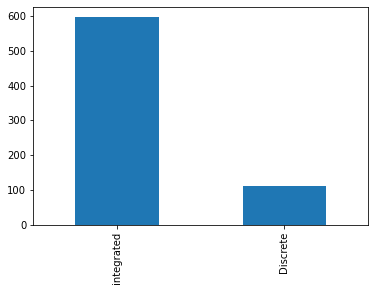

In [70]:
df["Тип видеокарты"].value_counts().plot(kind='bar')

In [78]:
df["Тип видеокарты"].isna().mean() 

0.20763187429854096

In [299]:
df['Видеоадаптер'].unique()

array(['Intel HD Graphics 500', 'Intel Iris Xe',
       'Графическая карта: Intel® Iris® Xe Graphics',
       'Intel UHD Graphics 600', nan, 'GeForce GTX 1650', 'UHD Graphics',
       'RTX 3070 Max-Q', 'Intel HD Graphics 600', 'Apple M1 Pro 16-core',
       'Intel UHD Graphics', 'Radeon Graphics', 'Apple M1 Pro 14-core',
       'AMD Radeon Vega 8', 'Iris Xe Graphics', 'Adreno 618',
       'GeForce MX350', 'встроенная', 'Iris Plus graphics',
       'встроенная видеокарта', 'Apple M2 8-core', 'встроенный',
       'GeForce RTX 3050', 'NVIDIA GeForce GTX 1650', 'UMA',
       'Intel Iris Xe Graphics', 'Radeon Vega 8', 'RTX 3070 Ti Max-Q',
       'AMD Radeon Graphics', 'Intel Iris Plus Graphics', 'AMD Radeon R5',
       'Apple M1 7-core', 'RTX3060', 'Radeon Vega 7',
       'Apple M2 8-core GPU', 'Intel UHD Graphics 605', 'Radeon Vega 3',
       'Apple M2 10-core', 'Intel HD', '"NVIDIA GeForce GTX 1650Ti "',
       'GeForce RTX 3060', 'UHD Graphics 600', 'Apple M1 8-core',
       'AMD Vega 6'

In [72]:
Intel_Iris_Xe = ['Intel Iris Xe', 'Графическая карта: Intel® Iris® Xe Graphics','Iris Xe Graphics', 'Intel® Iris® X', 'Iris Xe',
                 'Intel Iris Xe Graphics',  'Iris Xe graphics','Intel Iris Xᵉ Graphics', 'Intel; Intel Iris Xe Graphics; Intel Iris Xe',
                 'Intel Iris Xe Graphics; Intel Iris Xe; Intel','Intel Iris Xe Max Graphics (4 Гб)','Intel Iris Xe Graphics G4',
                 'Intel Iris Xe Graphics G7', 'Iris Plus graphics', 'Intel Iris Plus Graphics','Intel Iris Plus',
                 'Intel Iris Xe Graphics G7', 'Xe G7 80EUs']
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'Intel Iris Xe' if x in Intel_Iris_Xe else x)

NVIDIA_GeForce_RTX_3050_Ti = ['Nvidia RTX 3050 Ti', 'GeForce RTX 3050 Ti', 'RTX 3050 Ti Max-Q', 'NVIDIA GeForce RTX 3050 Ti',
                              'NVIDIA GeForce RTX 3050 Ti для ноутбука (4 Гб)','NVIDIA GeForce RTX 3050Ti','NVIDIA RTX3050Ti', 
                              'NVIDIA GeForce RTX 3050 Ti - 4096 Мб; NVIDIA GeForce RTX 3050 Ti; NVIDIA GeForce RTX 3050 Ti для ноутбуков (4 Гб)',
                              'NVIDIA GeForce RTX 3050 Ti 4 ГБ','NVIDIA GeForce RTX 3050 Ti (Max-Q)']
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'Nvidia RTX 3050 Ti' if x in NVIDIA_GeForce_RTX_3050_Ti else x)

NVIDIA_GeForce_RTX_3050 = ['GeForce RTX 3050', 'NVIDIA GeForce RTX 3050','RTX 3050 Max-Q','NVIDIA GeForce RTX 3050 - 4096 Мб',
                           'NVIDIA GeForce RTX3050','GeForce RTX 3050; Intel UHD Graphics', 
                           'RTX 3050', 'NVIDIA GeForce RTX 3050 4 ГБ','Intel UHD Graphics; GeForce RTX 3050' ]
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'GeForce RTX 3050' if x in NVIDIA_GeForce_RTX_3050 else x)

NVIDIA_GeForce_GTX_1650 = ['GeForce GTX 1650', 'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce® GTX 1650','NVidia GeForce GTX 1650 4Gb',
                           'NVIDIA GeForce GTX 1650 (4 Гб)','NVIDIA GeForce GTX 1650 4 ГБ GDDR6']
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'GeForce GTX 1650' if x in NVIDIA_GeForce_GTX_1650 else x)

NVIDIA_GeForce_GTX_1650_Ti = ['"NVIDIA GeForce GTX 1650Ti "','NVIDIA GeForce GTX 1660Ti','NVIDIA GeForce GTX 1650 Ti (4 Гб)']
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'NVIDIA GeForce GTX 1650Ti' if x in NVIDIA_GeForce_GTX_1650_Ti else x)

NVIDIA_GeForce_RTX_3060 = ['RTX3060', 'GeForce RTX 3060', 'NVIDIA GeForce RTX 3060','NVIDIA GeForce RTX 3060 6 ГБ', 
                           'NVIDIA® GeForce RTX™ 3060', 'RTX3060 6G',
                           'NVIDIA GeForce RTX 3060 (6 Гб); NVIDIA GeForce RTX 3060; NVIDIA GeForce RTX']
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'GeForce RTX 3060' if x in NVIDIA_GeForce_RTX_3060 else x)

NVIDIA_GeForce_RTX_3070 = ['RTX 3070 Max-Q', 'NVIDIA GeForce RTX 3070', 'NVIDIA GeForce RTX 3070 для ноутбука', 
                           'VGA RTX 3070']
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'NVIDIA GeForce RTX 3070' if x in NVIDIA_GeForce_RTX_3070 else x)

NVIDIA_GeForce_RTX_3070_Ti = ['RTX 3070 Ti Max-Q', 'NVIDIA GeForce RTX 3070 Ti (8 Гб)']
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'NVIDIA GeForce RTX 3070 Ti' if x in NVIDIA_GeForce_RTX_3070_Ti else x)

Intel_UHD_Graphics = ['UHD Graphics', 'Intel UHD Graphics', 'Intel UHD Graphics G1',
                      'UHD-графика Intel® для процессоров Intel® Core™ 10-го поколения',
                      'Intel® UHD Graphics for 10th Gen', 'Intel Iris UHD Graphics', 
                      'Intel 10th UHD Graphics', 'Intel UHD Graphics g1','Intel UHD Graphics 600', 'Intel HD Graphics 600',
                      'UHD Graphics 600', 'встроенная видеокарта Intel UHD Graphics 600', 'Intel UHD Graphics; Intel; Intel UHD',
                      'Intel; Intel UHD; Intel UHD Graphics', 'Intel UHD 600', 'Intel(R) UHD Graphics 600;',
                      'Intel UHD Graphics 620', 'Intel UHD Graphics 605','Intel HD','Intel','Intel HD Graphics', 'Intel UHD Graphics Xe G4',]
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'Intel UHD Graphics' if x in Intel_UHD_Graphics else x)

AMD_Radeon_Graphics = ['Radeon Graphics', 'AMD Radeon Graphics', 'AMD Radeon', 'Графическая система AMD® Radeon™',
                       'AMD Radeon Vega 7', 'AMD Radeon Vega 3', 'Radeon Vega 3 Graphics',
                       'Radeon Vega 7 Graphics', 'AMD Radeon Vega 8',
                       'Radeon Vega 7', 'AMD Radeon HD', 'AMD Radeon RX Vega 7', 
                       'Radeon Vega 8 Graphics', 'AMD Radeon Vega 8 Graphics',
                       'AMD Radeon Vega; AMD Radeon; AMD Radeon Vega 6',
                        'AMD Radeon Vega 7; AMD; AMD Radeon Vega',
                        'AMD Radeon Vega; AMD Radeon Vega 8; AMD', 
                       'AMD Radeon Vega 6','игровой ноутбук AMD Radeon Graphics',
                       'AMD Radeon Vega','Radeon Vega 8','Radeon Vega 3', 'AMD Vega 6', ]
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'AMD Radeon Graphics' if x in AMD_Radeon_Graphics else x)


Apple_M1  = ['Apple M1 Pro 16-core', 'Apple M1 Pro 14-core',
             'Apple M2 8-core', 'Apple M1 7-core','Apple M2 8-core GPU', 
             'Apple M2 10-core','Apple M1 8-core',
             'Apple M1 GPU','Apple M1','Apple M2','Apple M1 Pro (16 ядер)']
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'Apple M1' if x in Apple_M1 else x)

NVIDIA_GeForce_MX450  = ['NVIDIA® GeForce® MX450', 'GeForce MX450', 'NVIDIA GeForce MX450',
                         'NVIDIA GeForce MX450 - 2048 Мб',]
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'NVIDIA GeForce MX450' if x in NVIDIA_GeForce_MX450 else x)

other = ['Adreno 618', 'GeForce MX350', 'встроенная','встроенная видеокарта', 
         'встроенный', 'UMA','AMD Radeon R5',
         'MX450',  'MX330',
         'NVIDIA GeForce RTX', 'nVidia GeForce', 'nVidia GeForce MX',
         'AMD Radeon 620', 'AMD Radeon 660M',
         'NVIDIA GeForce MX450 (2 ГБ)', 'NVIDIA GeForce MX350',
         'Intel HD GeForce 4000', 'GeForce RTX2050', 
          'Radeon RX 6700S', 'AMD Radeon RX 6700S',
         'Nvidia GeForce MX330 2Gb', 'AMD Radeon RX 5500M',
         'дискретная видеокарта', 'NVIDIA GeForce MX350 (2 ГБ)',
         'NVIDIA GeForce MX350 2 ГБ', 
         'NVIDIA GeForce MX130', 'NVIDIA GeForce MX330', 'Интегрированный',
         'Встроенныя видеокарта']
df["Видеоадаптер"] = df["Видеоадаптер"].apply(lambda x: 'other' if x in other else x)

<AxesSubplot:>

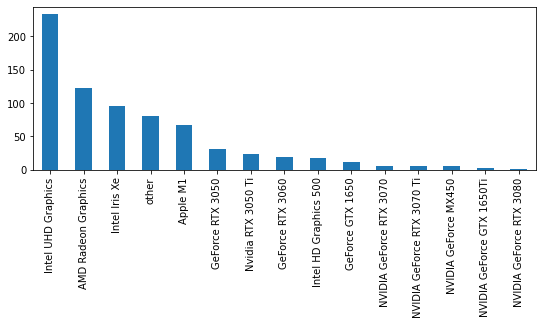

In [73]:
df["Видеоадаптер"].value_counts().plot(kind='bar', figsize=(9, 3))

In [77]:
df["Видеоадаптер"].isna().mean() 

0.1919191919191919

In [75]:
df["Объем памяти видеоадаптера"].isna().sum() 

492

<div class="alert alert-warning">
<b>⚠️: Столбец с данными по памяти видеоадаптера имеет очень много пропусков, удалим его.</b>

In [76]:
df.drop("Объем памяти видеоадаптера", axis=1, inplace=True)

### Порты 

In [305]:
df["Порт USB 3.x"].describe()

count     483
unique     39
top         2
freq      164
Name: Порт USB 3.x, dtype: object

In [306]:
df["Порт USB 3.x"].unique()

array([nan, 'Type-A USB 3.0', 'USB A 3.2 Gen 1 5 Гбит/с', 'USB 3.0',
       'USB 3.2 Gen 1 x 2', '1', '2', '3', '2 x USB 3.2 Gen1',
       '2xUSB 3.0', '2 шт', '1 шт.', '1 шт',
       '1x USB 3.2 Gen 1 Type-C; USB 3.2 Gen 1 Type-A', '0', '3 шт',
       '2 шт.', '3 шт.', 'нет', '4', '4 шт', 'есть',
       'USB 3.1 Type-A - 1 шт', '1; type c',
       'есть; 3.1-2 шт; USB-Type C - 1 шт', 'Да', 'USB 3.2 - 2шт.',
       'USB 3.2 - 1шт.', 'USB 3.2 Gen1', '2 порт', '1 шт; 1 шт.; 1',
       '2; 2 шт.; 2 шт', '1 шт.; 1; 1 шт', '2 шт; 2; 2 шт.',
       '1; 1 шт; 1 шт', '2; 2 шт; 2 шт', '2 шт; 2 шт.; 2',
       'USB 3.2 Type-A - 1 шт', 'USB 3.2 Type-A - 2 шт', '2 шт; 2; 2 шт'],
      dtype=object)

In [307]:
df["Порт USB 4.x"].describe()

count     144
unique      6
top         0
freq      131
Name: Порт USB 4.x, dtype: object

In [308]:
df["Порт USB-C"].describe()

count     415
unique     26
top         1
freq      231
Name: Порт USB-C, dtype: object

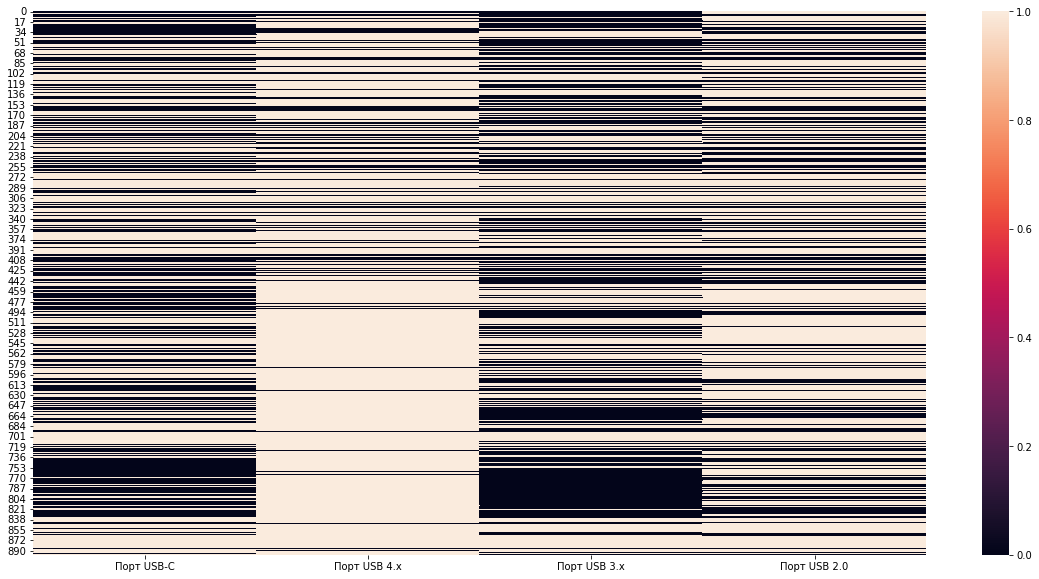

In [309]:
fig = plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    df[["Порт USB-C", "Порт USB 4.x", "Порт USB 3.x", 'Порт USB 2.0']].isnull()
)

In [79]:
df.drop(columns=["Порт USB-C", "Порт USB 4.x", "Порт USB 3.x", 'Порт USB 2.0'], inplace=True) #удаляем данные о портах из-за множества пропусков

### Характеристика продавца

<AxesSubplot:>

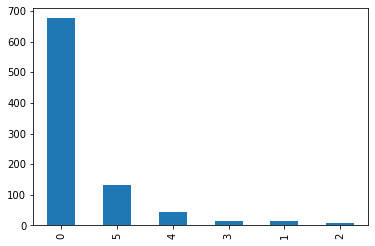

In [80]:
df['rating'].value_counts().plot(kind='bar') # все ок

In [312]:
df['seller_name'].isna().sum()#редких продавцов лучше занести в отдельную катеогрию. 

0

<AxesSubplot:>

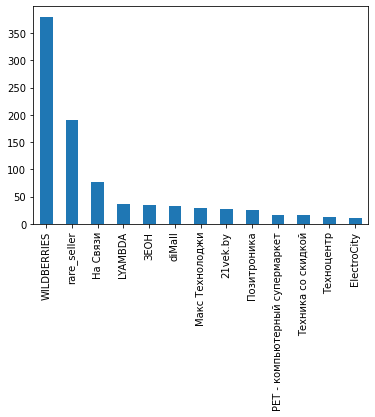

In [81]:
rare_seller = df['seller_name'].value_counts() <= 10
rare_seller = rare_seller[rare_seller].index
df['seller_name'] = df['seller_name'].apply(lambda x: 'rare_seller' if x in rare_seller else x)
df['seller_name'].value_counts().plot(kind='bar')

<div class="alert alert-success">
<b> ✔️Все продавцы у которых меньше 10 позиций названы редкими</b> </div>

<AxesSubplot:>

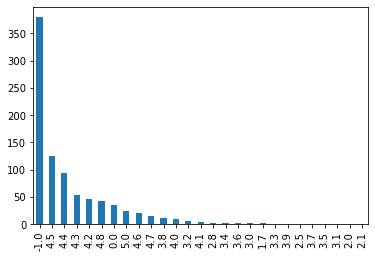

In [82]:
df['seller_rating'].value_counts().plot(kind='bar') # все ок, -1 присвоен Wildberries

In [315]:
df['seller_sales'].unique() # количество отзывов на товоры 

array(['-1', '8 943 отзыва на товары', '25 887 отзывов на товары',
       '1 137 отзывов на товары', '7 отзывов на товары',
       '32 550 отзывов на товары', '2 198 отзывов на товары',
       '41 отзыв на товары', '4 отзыва на товары',
       '2 725 отзывов на товары', '3 966 отзывов на товары',
       '3 133 отзыва на товары', '544 отзыва на товары',
       '156 отзывов на товары', '45 отзывов на товары',
       '172 отзыва на товары', '0 отзывов на товары',
       '2 отзыва на товары', '2 851 отзыв на товары',
       '1 557 отзывов на товары', '5 537 отзывов на товары',
       '414 отзывов на товары', '108 отзывов на товары',
       '797 отзывов на товары', '11 отзывов на товары',
       '547 отзывов на товары', '9 отзывов на товары',
       '6 отзывов на товары', '860 отзывов на товары',
       '32 552 отзыва на товары', '447 отзывов на товары',
       '119 отзывов на товары', '8 отзывов на товары',
       '2 532 отзыва на товары', '305 отзывов на товары',
       '1 отзыв на товары

<AxesSubplot:>

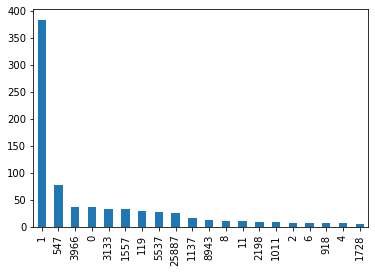

In [83]:
df.rename(columns={'seller_sales': 'number_of_reviews'}, inplace=True)
df['number_of_reviews'] = df['number_of_reviews'].apply(lambda x: int(re.findall(r'\d+', str(x).replace(" ", ""))[0]))
df['number_of_reviews'].value_counts()[:20].plot(kind='bar')

In [ ]:
#df['number_of_reviews'].info()

<div class="alert alert-success">
<b>✔️: Столбец seller_sales был переименован в number_of_reviews. Тип данных int 64</b> </div>

In [84]:
df['feedbacks'].isna().sum()

0

### Удаление столбцов с большим количеством пропусков

In [108]:
to_drop = df.columns[df.isna().mean()>0.6]
df.drop(columns=to_drop, inplace=True)
to_drop

Index(['Разъем карт памяти'], dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 896
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Наименование                      891 non-null    object 
 1   Скидка                            891 non-null    int64  
 2   Цена                              891 non-null    int64  
 3   Бренд                             889 non-null    object 
 4   feedbacks                         891 non-null    int64  
 5   rating                            891 non-null    int64  
 6   seller_name                       891 non-null    object 
 7   seller_rating                     891 non-null    float64
 8   number_of_reviews                 891 non-null    int64  
 9   Тактовая частота процессора, МГц  891 non-null    float64
 10  Количество ядер процессора        891 non-null    float64
 11  Линейка процессоров               891 non-null    object 
 12  Процессо

In [110]:
df.head()

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,number_of_reviews,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Разъем HDMI,Объем оперативной памяти (Гб),Тип оперативной памяти,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,LAN разъем (RJ45)
0,"NB283 14"" N3350, 14"" 1366*768 IPS",21,17390,Irbis,68,5,WILDBERRIES,-1.0,1,1.1,2.0,Intel Celeron,Intel Celeron N3350,1.27 кг,Intel,адаптер питания; гарантийный талон; инструкция...,eMMC,win,IPS,14.0,матовая,1368x768,1 miniHDMI,4.0,LPDDR4,integrated,Intel HD Graphics 500,NaN,0.0
1,Intel Core i5 2.4ГГц 8ГБ 512ГБ,16,64990,Realme,9,5,WILDBERRIES,-1.0,1,2.4,4.0,Intel Core i5 11 го поколения,11th Gen Intel i5 1135G7,1.38 кг,Intel,NaN,SSD,win,IPS,14.0,NaN,2160x1440,NaN,8.0,4266 МГц LPDDR4c,integrated,Intel Iris Xe,512 Гб,0.0
2,Intel Core i5 2.4ГГц 16ГБ 512ГБ,16,79990,Realme,8,5,WILDBERRIES,-1.0,1,2.4,4.0,Intel Core i5,Intel Core i5,1.37 кг,Intel,NaN,SSD,win,IPS,14.0,NaN,2160x1440,NaN,16.0,LPDDR4,NaN,Intel Iris Xe,512 Гб,0.0
3,"NB290 15.6"" N4020 3200x1800 IPS 4+128G",21,21090,Irbis,23,5,WILDBERRIES,-1.0,1,1.1,2.0,Intel Celeron,Intel Celeron N4020,1.7 кг,Intel,адаптер питания; гарантийный талон; инструкция...,eMMC,win,IPS,15.6,NaN,3024x1964,1 miniHDMI,4.0,LPDDR4,integrated,Intel UHD Graphics,NaN,0.0
4,"Ноутбук AZ-1511 15.6"" 4x2Ghz 16Gb 512Gb",0,30400,Azerty,54,5,Техноцентр,4.7,8943,2.0,4.0,Celeron,Intel Celeron N5105,1.9 кг,Intel,Блок питания - 1 шт; Ноутбук - 1 шт,M.2,win,IPS,15.6,матовая,NaN,1,16.0,DDR4,integrated,NaN,512 Гб,0.0


####  Просмотрим сведения в столбце "Оптический привод" 

In [322]:
df['Оптический привод'].unique()

array([nan, 'нет', 'Нет', 'отсутствует', 'без ODD', 'без', 'NO DVD',
       'отсутсвует', 'отсуствует', 'noDVD', 'отсутствует; Нету; Нет',
       'Нет; отсутствует; Нету', 'Нету; Нет; отсутствует', 'Нету; Нет',
       'Нет; Нету; отсутствует', 'Нету; отсутствует; Нет'], dtype=object)

Мы видим адекватное количество уникальных данных.

In [87]:
skip = (df['Оптический привод'].isna().sum()/df['Оптический привод'].isna().count()) * 100
print (f'{skip:5.1f}% данных пропуски')

 41.4% данных пропуски


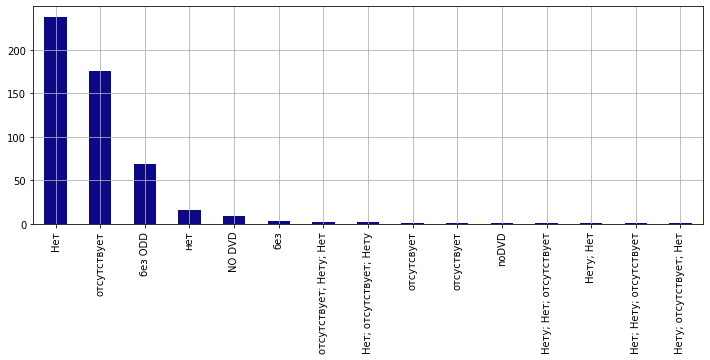

In [324]:
grouped = df['Оптический привод'].value_counts()

grouped.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

Уже поверхностный анализ дает позволяет принять решение об удалении столбца. Все варианты заполнения показывают отсуствие оптического привода

In [88]:
df = df.drop('Оптический привод', axis =1)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ Столбец обработан! </b></u></p>

####  Просмотрим сведения в столбце "Толщина предмета" 

In [326]:
list = df['Толщина предмета'].unique()

In [327]:
list

array([nan, '2.37 см', '2.4 см', '2 см', '2.7 см', '2.1 см', '1.53 см',
       '1.7 см', '1.6 см', '1.79 см', '1.99 см', '1.55 см', '2.3 см',
       '2.6 см', '1.48 см', '1.4 см', '2.06 см', '2.2 см', '1.13 см',
       '2.5 см', '1.59 см', '1.9 см', '2.08 см', '1.92 см', '1.61 см',
       '1.56 см', '21.1 см', '2.29 см', '17.9 см', '1.8 см', '1.69 см',
       '1.89 см', '3.2 см', '0.79 см', '1.68 см', '24.4 см', '1 см',
       '1.5 см', '1.22 см', '1.42 см', '1.66 см', '2.9 см', '2.15 см',
       '15 см', '0.02 см', '23.5 см', '33 см', '2.68 см', '10 см',
       '24 см', '2.35 см', '26.11 см', '15.5 см', '1.49 см', '1.85 см',
       '3 см', '2.61 см', '2.49 см', '20 см', '1.94 см', '2.47 см',
       '19.9 см', '1.84 см', '2.25 см', '2.59 см', '2.24 см', '2.83 см',
       '2.72 см', '2.46 см', '2.07 см', '1.75 см', '1.81 см', '24.2 см',
       '19.1 см', '1.2 см', '1.77 см'], dtype=object)

In [89]:
skip = (df['Толщина предмета'].isna().sum()/df['Толщина предмета'].isna().count()) * 100
print (f'{skip:5.1f}% данных - пропуски')

 45.5% данных - пропуски


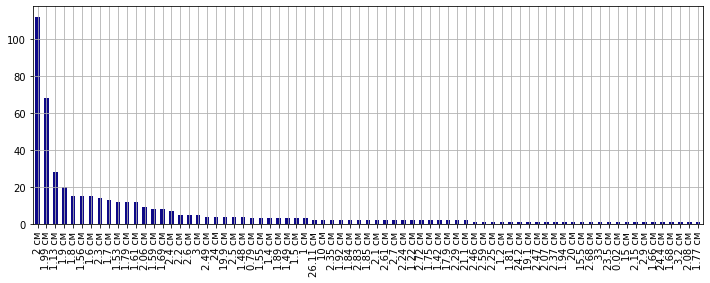

In [329]:
grouped = df['Толщина предмета'].value_counts()
grouped.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma')

Учитывая распределение данных (значения не отличаются существенно, за исключением нескольких выбросов) и поличество пропусков. Предлагю столбец удалить.

In [90]:
df = df.drop('Толщина предмета', axis =1)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ Столбец обработан! </b></u></p>

#### Смотрим столбец LAN разъем (RJ45)

In [331]:
df['LAN разъем (RJ45)'].unique()

array([nan, '1', '0', 'нет', '1 шт', 'есть', '1 шт.', 'RJ-45',
       'Отсутствует', 'не предусмотрен', 'да', 'LAN 10/100/1000',
       '1 Gbit', '1000 Мбит/с (GE)',
       '10/100/1000 (Gigabit Ethernet) Мбит/с', 'Есть', '1 Гбит/с', 'LAN',
       'FCBGA1090', '2.5 Gbit', '1 Gbit, есть', 'Нету', 'нету', '1шт;'],
      dtype=object)

In [91]:
skip = (df['LAN разъем (RJ45)'].isna().sum()/df['LAN разъем (RJ45)'].isna().count()) * 100
print (f'{skip:5.1f}% данных - пропуски')

 53.6% данных - пропуски


Более половины данных пропущены

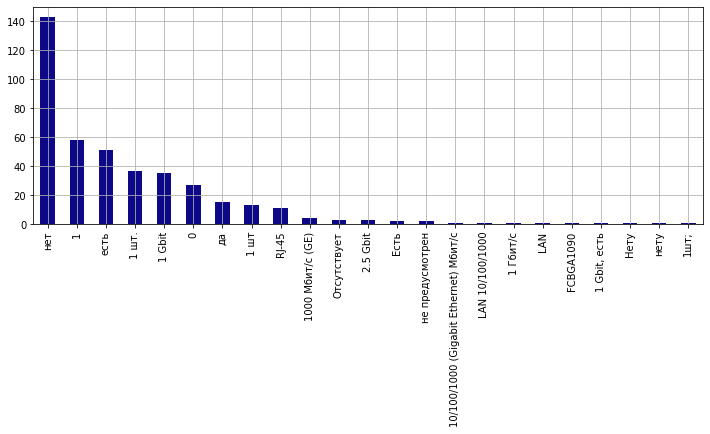

In [333]:
grouped = df['LAN разъем (RJ45)'].value_counts()
grouped.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma')

Вероятно данный показатель не оказывает существенного влияния на цену. Однако можно попробовать обрабатать данные и привести к формату есть нет. 

In [92]:
list_1 = ['1', '1 шт', 'есть', '1 шт.', 'RJ-45',
       'да', 'LAN 10/100/1000',
       '1 Gbit', '1000 Мбит/с (GE)',
       '10/100/1000 (Gigabit Ethernet) Мбит/с', 'Есть', '1 Гбит/с', 'LAN',
       'FCBGA1090', '2.5 Gbit', '1 Gbit, есть', '1шт;']

list_2 = [ '0', 'нет', 
       'Отсутствует', 'не предусмотрен', 
        'Нету', 'нету']

In [93]:
def transform_lan(value):
    if value in list_1:
        return 1
    if value in list_2:
        return 0

df["LAN разъем (RJ45)"] = df["LAN разъем (RJ45)"].map(transform_lan)

In [94]:
df['LAN разъем (RJ45)'].value_counts()


1.0    236
0.0    177
Name: LAN разъем (RJ45), dtype: int64

In [95]:
# Заполним пропуски значением 0.
df['LAN разъем (RJ45)'] = df['LAN разъем (RJ45)'].fillna(0)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ Столбец обработан! </b></u></p>

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 896
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Наименование                      891 non-null    object 
 1   Скидка                            891 non-null    int64  
 2   Цена                              891 non-null    int64  
 3   Бренд                             889 non-null    object 
 4   feedbacks                         891 non-null    int64  
 5   rating                            891 non-null    int64  
 6   seller_name                       891 non-null    object 
 7   seller_rating                     891 non-null    float64
 8   number_of_reviews                 891 non-null    int64  
 9   Тактовая частота процессора, МГц  891 non-null    float64
 10  Количество ядер процессора        891 non-null    float64
 11  Линейка процессоров               891 non-null    object 
 12  Процессо

##### Столбец "интерфейс"

In [339]:
skip = (df['Интерфейс'].isna().sum()/df['Интерфейс'].isna().count()) * 100
print (f'{skip:5.1f}% данных - пропуски')

 44.2% данных - пропуски


Детальное изучение столбца, показыываем, что поле содержит большой обьем разрозненных данных. Часть из них повторялась в столбцах, удаленных ранее. часть дублируется. В целом можно предположить, что дступные интерфейсы в массе, не самый важный фактом ценообразования. Столбец удаляем

In [97]:
df = df.drop('Интерфейс', axis =1)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ Столбец обработан! </b></u></p>

#### Количество слотов оперативной памяти

In [341]:
skip = (df['Количество слотов оперативной памяти'].isna().sum()/df['Количество слотов оперативной памяти'].isna().count()) * 100
print (f'{skip:5.1f}% данных - пропуски')

 67.5% данных - пропуски


In [342]:
df['Количество слотов оперативной памяти'].unique()

array([nan, '2', '1', 'нет', '1 шт', '2 шт', '2 слота', '2 шт.', '1 шт.',
       '1 слот', 'отсутствуют', '0', '3 шт', '1; 1 шт; 1 слот',
       '2 слота; 2 шт.; 2 шт', '2 шт.; 2 шт; 2 слота',
       '2 шт; 2 шт; 2 слота', '2 слота; 2 шт; 2 шт',
       '2 слота; 2 шт; 2 шт.'], dtype=object)

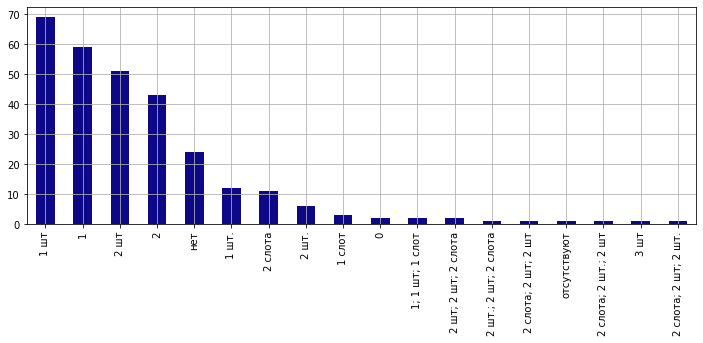

In [343]:
grouped = df['Количество слотов оперативной памяти'].value_counts()
grouped.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma');

Большая часть ноутбуков, с заполненными данными имеет 1 слот для оперативной памяти. Само поле имеет 67% пропусков. Предполагаю можно удалять 

In [ ]:
df = df.drop('Количество слотов оперативной памяти', axis =1)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ Столбец обработан! </b></u></p>

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 896
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Наименование                      891 non-null    object 
 1   Скидка                            891 non-null    int64  
 2   Цена                              891 non-null    int64  
 3   Бренд                             889 non-null    object 
 4   feedbacks                         891 non-null    int64  
 5   rating                            891 non-null    int64  
 6   seller_name                       891 non-null    object 
 7   seller_rating                     891 non-null    float64
 8   number_of_reviews                 891 non-null    int64  
 9   Тактовая частота процессора, МГц  891 non-null    float64
 10  Количество ядер процессора        891 non-null    float64
 11  Линейка процессоров               891 non-null    object 
 12  Процессо

Таким образом, после чистки данных нам удалось существенно сократить количество столбцов (c 79 до 28), выделить значимую информацию, распарсить грязные данные.
Далее проведем визуализацию некоторых признаков

## Визуализация

In [100]:
df.head()

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,number_of_reviews,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,LAN разъем (RJ45)
0,"NB283 14"" N3350, 14"" 1366*768 IPS",21,17390,Irbis,68,5,WILDBERRIES,-1.0,1,1.1,2.0,Intel Celeron,Intel Celeron N3350,1.27 кг,Intel,адаптер питания; гарантийный талон; инструкция...,eMMC,win,IPS,14.0,матовая,1368x768,1 miniHDMI,micro SD,4.0,LPDDR4,integrated,Intel HD Graphics 500,NaN,0.0
1,Intel Core i5 2.4ГГц 8ГБ 512ГБ,16,64990,Realme,9,5,WILDBERRIES,-1.0,1,2.4,4.0,Intel Core i5 11 го поколения,11th Gen Intel i5 1135G7,1.38 кг,Intel,NaN,SSD,win,IPS,14.0,NaN,2160x1440,NaN,NaN,8.0,4266 МГц LPDDR4c,integrated,Intel Iris Xe,512 Гб,0.0
2,Intel Core i5 2.4ГГц 16ГБ 512ГБ,16,79990,Realme,8,5,WILDBERRIES,-1.0,1,2.4,4.0,Intel Core i5,Intel Core i5,1.37 кг,Intel,NaN,SSD,win,IPS,14.0,NaN,2160x1440,NaN,NaN,16.0,LPDDR4,NaN,Intel Iris Xe,512 Гб,0.0
3,"NB290 15.6"" N4020 3200x1800 IPS 4+128G",21,21090,Irbis,23,5,WILDBERRIES,-1.0,1,1.1,2.0,Intel Celeron,Intel Celeron N4020,1.7 кг,Intel,адаптер питания; гарантийный талон; инструкция...,eMMC,win,IPS,15.6,NaN,3024x1964,1 miniHDMI,microSD,4.0,LPDDR4,integrated,Intel UHD Graphics,NaN,0.0
4,"Ноутбук AZ-1511 15.6"" 4x2Ghz 16Gb 512Gb",0,30400,Azerty,54,5,Техноцентр,4.7,8943,2.0,4.0,Celeron,Intel Celeron N5105,1.9 кг,Intel,Блок питания - 1 шт; Ноутбук - 1 шт,M.2,win,IPS,15.6,матовая,NaN,1,NaN,16.0,DDR4,integrated,NaN,512 Гб,0.0


### Зависимость средней цены от количества ядер процесора

In [101]:
price_cores = df.groupby( by='Количество ядер процессора', as_index=False)[['Цена']].mean().round()

fig = px.bar(
    data_frame = price_cores, 
    x="Количество ядер процессора", 
    y="Цена", 
    color='Количество ядер процессора', 
    text = 'Цена', 
    orientation='v', 
    height=500, 
    width=1000, 
    title = 'Зависимость средней цены от количества ядер процессора' 
)

fig.show()

Посмотрим на ноутбуки с количеством ядер 12 и 14.

In [102]:
df[df['Количество ядер процессора']==12]

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,number_of_reviews,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,LAN разъем (RJ45)
128,Ноутбук Vivobook Pro 15 OLED K6500ZC-MA359,9,97900,Asus,0,0,WILDBERRIES,-1.0,1,2.4,12.0,Intel core i5 12500H,Intel Core i5,NaN,NVIDIA,NaN,SSD,no_os,NaN,15.6,NaN,2880x1800,NaN,NaN,16.0,NaN,NaN,NaN,512 Гб; 512 GB,0.0
325,Ультрабук UX3402ZA-KM302W I585SUW1 (90NB0WC1-M...,5,97900,Asus,0,0,WILDBERRIES,-1.0,1,2.4,12.0,Core i5,Core i5 1240P,NaN,Intel,NaN,SSD,win,OLED,14.0,NaN,2880x1800,1,NaN,8.0,LPDDR5,integrated,Intel Iris Xe,512 Гб,0.0
451,Ноутбук Pulse GL66 (i5 12500H 8ГБ 512ГБ SSD RT...,27,133753,MSI,0,0,ЗЕОН,4.8,3133,2.5,12.0,Intel Core i5,Intel Core i5 12500H,2.25 кг,NVIDIA,"ноутбук, адаптер питания, документация",SSD,no_os,IPS,15.6,матовая,1920x1080,1 шт,NaN,8.0,"DDR4, 3200 МГц; SO-DIMM",Discrete,Nvidia RTX 3050 Ti,512 Гб,1.0
474,Ноутбук Pulse G76 12UDK-282XRU,27,142671,MSI,0,0,ЗЕОН,4.8,3133,2.5,12.0,Intel Core i5,Intel Core i5 12500H,2.66 кг,NVIDIA,"документация, адаптер питания",SSD,no_os,IPS,17.3,матовая,1920x1080,1,NaN,8.0,DDR4; SO-DIMM,Discrete,Nvidia RTX 3050 Ti,512 Гб,1.0
519,"Ноутбук T8-DA5NP+ IPS 16"" 165Гц Intel i5 12500H",0,107490,Hasee,0,0,rare_seller,4.6,2198,2.4,12.0,Intel core i5 12500H,Intel Core i5 12500H,NaN,NVIDIA,Ноутбук - 1 шт; Блок питания - 1 шт; Кабель бл...,SSD,no_os,IPS,16.0,матовая,1600x900,1,NaN,16.0,DDR4,Discrete,GeForce RTX 3060,512 Гб,1.0
537,Ноутбук Victus 16-d1059ci (6K317EA),0,135509,HP,0,0,rare_seller,4.5,741,2.5,12.0,Intel Core i5,Intel Core i5 12500H,2.46 кг,NVIDIA,ноутбук; блок питания; аккумулятор,SSD,no_os,IPS,16.1,матовая,1920x1080,1,SD,16.0,DDR5,Discrete,Nvidia RTX 3050 Ti,512 Гб,1.0
554,"Ноутбук T8-DA5NP+, 16"", Intel i5 12500H, 16ГБ,...",0,105490,Hasee,1,5,rare_seller,4.5,2532,3.3,12.0,Intel Core i5 12500H,Intel Core i5 12500H,2.15 кг,NVIDIA,"ноутбук- 1шт, зарядное устройство - 1шт, докум...",SSD,no_os,IPS,16.0,матовая,1600x900,1,NaN,16.0,DDR4,Discrete,GeForce RTX 3060,512 Гб,1.0
557,"Игровой ноутбук 17,3"" intel core i5-12500h, RT...",0,101990,Lyambda,0,0,LYAMBDA,4.3,3966,2.5,12.0,Intel Core i5,Intel Core i5-12500H (2.5 ГГц),2.52 кг,Nvidia,"Ноутбук, зарядное устройство",SSD,no_os,IPS,17.3,Матовая,1920x1080,1,NaN,16.0,DDR4,Discrete,Nvidia RTX 3050 Ti,512,1.0
574,"Игровой ноутбук 15.6"", intel core i5-12500h RA...",0,79990,Lyambda,0,0,LYAMBDA,4.3,3966,2.5,12.0,Intel Core i5,Intel Core i5-12500H (2.5 ГГц),2.17 кг,NVIDIA,"Ноутбук, зарядное устройство",SSD,no_os,IPS,15.6,матовая,1920x1080,1,NaN,8.0,DDR4,Discrete,GeForce GTX 1650,256,1.0


In [103]:
df[df['Количество ядер процессора']==14]

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,number_of_reviews,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,LAN разъем (RJ45)
7,Ноутбук AORUS 5 SE4,21,147490,Gigabyte,0,0,WILDBERRIES,-1.0,1,2.3,14.0,Core i7,Core i7 12700H,2.3 кг,NVIDIA,"Ноутбук, документация, адаптер питания с кабел...",SSD,no_os,IPS,15.6,матовая,1920x1080,1,"SD, SDHC, SDXC, MMC",16.0,DDR4,Discrete,NVIDIA GeForce RTX 3070,512 Гб,1.0
63,Ноутбук AERO 17 XE5,21,235790,Gigabyte,0,0,WILDBERRIES,-1.0,1,2.3,14.0,Core i7,Core i7 12700H,2.6 кг,NVIDIA,"Ноутбук, документация, адаптер питания с кабел...",SSD,win,IPS,17.3,матовая,2160x1440,1,NaN,32.0,DDR5,Discrete,NVIDIA GeForce RTX 3070 Ti,1024 Гб,0.0
276,Ноутбук AERO 16 XE4,21,218190,Gigabyte,0,0,WILDBERRIES,-1.0,1,2.3,14.0,Core i7,Core i7 12700H,2.3 кг,NVIDIA,"Ноутбук, документация, адаптер питания с кабел...",SSD,win,OLED,16.0,матовая,3840x2160,1,NaN,16.0,DDR4,Discrete,NVIDIA GeForce RTX 3070 Ti,1024 Гб,0.0
295,Ноутбук AORUS 15 XE5-73RU544UH,21,182390,Gigabyte,0,0,WILDBERRIES,-1.0,1,2.3,14.0,Core i7,Core i7 12700H,2.4 кг,NVIDIA,"Ноутбук, документация, адаптер питания с кабел...",SSD,win,IPS,15.6,матовая,1920x1080,1,NaN,16.0,DDR5,Discrete,NVIDIA GeForce RTX 3070 Ti,512 Гб,1.0
296,Ноутбук AORUS 15 XE5,21,181990,Gigabyte,0,0,WILDBERRIES,-1.0,1,2.3,14.0,Core i7,Core i7 12700H,2.4 кг,NVIDIA,"Ноутбук, документация, адаптер питания с кабел...",SSD,no_os,IPS,15.6,NaN,1920x1080,1,NaN,32.0,DDR5,Discrete,NVIDIA GeForce RTX 3070 Ti,512 Гб,1.0
301,Ноутбук PH315-55-71Q8,5,122490,Acer,0,0,WILDBERRIES,-1.0,1,2.3,14.0,Intel Core i7 - 12700H,Intel Core i7 - 12700H,NaN,NaN,NaN,NaN,no_os,IPS,15.6,NaN,1920x1080,NaN,NaN,16.0,DDR5,NaN,GeForce RTX 3060,512 Гб,0.0
314,Ноутбук AORUS 5 SE4,21,158590,Gigabyte,0,0,WILDBERRIES,-1.0,1,2.3,14.0,Core i7,Core i7 12700H,2.3 кг,NVIDIA,"Ноутбук, документация, адаптер питания с кабел...",SSD,win,IPS,15.6,матовая,1920x1080,1,"SD, SDHC, SDXC, MMC",16.0,DDR4,Discrete,NVIDIA GeForce RTX 3070,512 Гб,1.0
465,Ноутбук S15C-i712700H3050Ti4GF,27,132260,Machenike,0,0,ЗЕОН,4.8,3133,4.7,14.0,Intel Core i7,Intel Core i7-12700H,2 кг,NVIDIA,"документация, адаптер питания",SSD,no_os,IPS,15.6,матовая,1920x1080,NaN,NaN,16.0,NaN,Discrete,Nvidia RTX 3050 Ti,512 Гб,1.0
518,"Ноутбук T8-DA9NT 16"" IPS 165 Hz Intel i9 12900H",0,124490,Hasee,1,2,rare_seller,4.6,2198,2.4,14.0,Intel Core i9 12900H,Intel Core i9 12900H,2.15 кг,NVIDIA,Ноутбук - 1 шт; Блок питания - 1 шт; Кабель бл...,SSD,no_os,IPS,16.0,матовая,1600x900,1,NaN,16.0,DDR4,Discrete,GeForce RTX 3060,1ТБ,1.0
525,Ноутбук Predator i9 1TB SDD IPS165Hz NV RTX307...,0,200000,Acer,0,0,LYAMBDA,4.3,3966,2.4,14.0,Intel Core i9,Intel Core i9-12900H (3.8 ГГц),2.5 кг,Nvidia,"Ноутбук, блок питания",SSD,win,IPS,17.3,Матовый,2560x1600,1,NaN,16.0,SO-Dimm,Discrete,NVIDIA GeForce RTX 3070 Ti,1024,0.0


А так же на ноутбуки с 10 ядрами.

In [371]:
df[df['Количество ядер процессора']==10]

,Наименование,Скидка,Цена,Бренд,feedbacks,rating,seller_name,seller_rating,number_of_reviews,"Тактовая частота процессора, МГц",Количество ядер процессора,Линейка процессоров,Процессор,Вес без упаковки (кг),Производитель видеопроцессора,Комплектация,Тип накопителя,Операционная система,Тип матрицы,Диагональ экрана,Поверхность экрана,Разрешение экрана,Разъем HDMI,Разъем карт памяти,Объем оперативной памяти (Гб),Тип оперативной памяти,Тип видеокарты,Видеоадаптер,Объем накопителя SSD,LAN разъем (RJ45)
11,MacBook Pro 16 M1 Pro 16 ГБ 512 Гб RU,5,229990,Apple,0,0,WILDBERRIES,-1.0,1,2.4,10.0,Apple M1 PRO,Apple M1 Pro,2.17 кг,Apple,документация; ноутбук; адаптер питания,SSD,mac_os,IPS,16.2,глянцевая,3456x2234,1 шт.,SDXC,16.0,NaN,integrated,Apple M1,512 Гб,-1.0
169,MacBook Pro 14 M1 Pro 16 ГБ 1 Тб US,16,219990,Apple,0,0,WILDBERRIES,-1.0,1,2.4,10.0,Apple M1 PRO,Apple M1 Pro,1.61 кг,Apple,документация; ноутбук; адаптер питания,SSD,mac_os,IPS,14.2,глянцевая,3024x1964,1 шт.,SDXC,16.0,NaN,integrated,Apple M1,1 Тб,-1.0
180,Ноутбук,25,73190,HP,0,0,WILDBERRIES,-1.0,1,2.4,10.0,Intel® Core™ i7-1255U,Intel® Core™ i7-1255U,NaN,Intel,NaN,SSD,no_os,IPS,15.6,NaN,1368x768,NaN,NaN,8.0,DDR4,integrated,Intel Iris Xe,512 Гб,-1.0
267,НЕТ,10,460000,Ноутбук Apple MacBook Pro 16,1,5,rare_seller,3.4,7,2.4,10.0,Apple M1 PRO,Apple M1 Pro,2.15 кг,NaN,NaN,SSD,mac_os,NaN,16.2,NaN,3456x2234,1,NaN,16.0,NaN,NaN,NaN,512 Гб,-1.0
364,Ноутбук Pavilion 15-eg2019ci (6G804EA),11,77900,HP,0,0,WILDBERRIES,-1.0,1,4.4,10.0,Core i5-1235U,Intel Core i5-1235U,NaN,NaN,NaN,SSD,win,IPS,15.6,NaN,1920x1080,NaN,NaN,16.0,DDR4,integrated,NaN,512 Гб,-1.0
494,Ноутбук Redmibook Redmi G i7 16'' 2.5K 165Hz R...,0,105590,Xiaomi,0,0,rare_seller,4.6,2198,3.5,10.0,Intel Core i7 12650H,Intel,3.2 кг,NVIDIA,NaN,SSD,win,IPS,16.0,NaN,1920x1080,Есть,Есть,16.0,"16 ГБ, DDR5, 4800 МГц",Discrete,GeForce RTX 3050,512 Гб,1.0
531,"Ноутбук ProBook 450 G9 15.6"" 16Gb 512Gb SSD W1...",0,163600,HP,0,0,LYAMBDA,4.3,3966,3.5,10.0,Intel Core i7,Intel Core i7-1255U (3.5 ГГц),1.74 кг,Intel,"Ноутбук, блок питания",SSD,win,IPS,15.6,Матовое,1920x1080,NaN,NaN,16.0,SO-Dimm,integrated,Intel Iris Xe,512,-1.0
535,"Ноутбук ProBook 450 G9 15.6"" i7-1255U 16Gb 512...",0,151870,HP,0,0,LYAMBDA,4.3,3966,3.5,10.0,Intel Core i7,Intel Core i7-1255U (3.5 ГГц),1.74 кг,Intel,"Ноутбук, блок питания",SSD,no_os,IPS,15.6,Матовое,1920x1080,NaN,NaN,16.0,SO-Dimm,integrated,Intel Iris Xe,512,-1.0
547,Ноутбук Redmibook Redmi G i7 16'' 165Hz RTX3050Ti,0,110490,Xiaomi,0,0,rare_seller,4.6,2198,3.5,10.0,Intel Core i7 12650H,Intel Core i7 12650H,3.2 кг,NVIDIA,NaN,SSD,win,IPS,16.0,матовая,1600x900,Есть,NaN,16.0,"16 ГБ, DDR5, 4800 МГц",Discrete,Nvidia RTX 3050 Ti,512 Гб,1.0
684,Ноутбук,0,64990,HP,0,0,rare_seller,4.2,1011,2.4,10.0,Intel Core i5 1235U,Intel Core i5,1.69 кг,Intel,NaN,NaN,no_os,IPS,15.6,NaN,1920x1080,NaN,NaN,16.0,DDR5,integrated,NaN,NaN,-1.0


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b> В категорию ноутбуков с 10 и 8 ядрами попадают ноутбуки Apple, что создает аномалию в зависимости средней цены от количества ядер процессора. </b></u></p>

### Зависимость средней цены ноутбука от линейки процессора

In [104]:
price_CPU = df.groupby( by='Линейка процессоров',
                       as_index=False)[['Цена']].mean().round()
fig = px.treemap(
    data_frame = price_CPU,
    path=['Линейка процессоров'], 
    values='Цена', 
    height=900,
    width=900, 
    title='Зависимость средней цены ноутбука от процессора' 
)

fig.show()

c:\Users\ttnch\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b> Здесь более отчетливо видно причину аномалии в предыдущем пункте. </b></u></p>

### Зависимость между количествами ядер процессора и размером оперативной памяти. 

In [105]:
fig = px.scatter(df, x='Объем оперативной памяти (Гб)' 
                ,y='Количество ядер процессора'
                ,color='Количество ядер процессора'
                ,marginal_x="histogram"
                ,marginal_y="histogram"
                )
fig.update_layout(
title_text ='Зависимость между количеством ядер процессора и размером опреативной памяти',
bargap=0.1)
fig.show()

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b> Больше всего в продаже ноутбуков с 2 ядрами и 8 Гб оперативной памяти. </b></u></p>

### Зависимость между средней ценой и типом видеокарты.

In [106]:
price_cores = df.groupby( by='Тип видеокарты', as_index=False)[['Цена']].mean().round()

fig = px.bar(
    data_frame = price_cores, 
    x="Тип видеокарты", 
    y="Цена", 
    color='Тип видеокарты', 
    text = 'Цена', 
    orientation='v', 
    height=500, 
    width=1000, 
    title = 'Зависимость между средней ценой и типом видеокарты.' 
)

fig.show()

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b> Такая зависимость ожидаема, поскольку ноутбуки с дискретной видеокартой обычно стоят дороже, чем ноутбуки со встроенной. </b></u></p>

### Зависимость средней цены ноутбука от видеоадаптера.

In [107]:
price_v = df.groupby( by='Видеоадаптер', as_index=False)[['Цена']].mean().round()

fig = px.bar(
    data_frame = price_v, 
    x="Видеоадаптер", 
    y="Цена", 
    color='Видеоадаптер', 
    text = 'Цена', 
    orientation='v', 
    height=500, 
    width=1000, 
    title = 'Зависимость между средней ценой и видеоадаптером.' 
)

fig.show()

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b> На первых местах по стоимости идут ноутбуки с топовыми дискретными видеокартами Nvidia, на третьем расположилась продукция Apple. </b></u></p>